# Hate Crime in San Diego

Team Members:

- Pratyush Juneja: A14884072

- Aurelio Barrios:A15290207

# Why Hate Crime? What do we hope to Accomplish?

The reason we chose this topic was initially because of an article we found detailing rates of Hate Crimes in San Diego since 2015. This definitely does not deserve to be a 21st Century Issue. Where is this hate crime occuring? What is causing this hate crime? Questions like these are just the tip of the iceberg of what we were hoping to accomplish through this project. This coupled with the recent rise in hatecrime towards asians due to the recent Covid19 outbreak made us want to do a deeper dive into this project

The goal of our project was to try and understand hate crimes spatially across San Diego. More
specifically we wanted to see how the diversity of a specific area affected the hate crime rate in
that area. Our initial thought was that areas with more diversity would mean that the hate crime
rate in that area would be smaller. This belief arose from the idea that since people would be
accustomed to being around people of different ethnic backgrounds they would therefore be more
accepting of each other. Another observation we wanted to make was how average income levels of
specific areas were related to the hate crime rate in these areas. Income is a huge factor in peoples
day to day lives so we knew that income was an important attribute to consider.
We recognize that San Diego is a place that is culturally diverse, that is why answering the question
posed is extremely valuable to the San Diego community. Understanding the rise in hate crime
will help us find solutions to this problem making San Diego a better and safer place. This is also
why investigating this could prove to be valuable to the San Diego police force. Understanding this
issue could lead to a police force that is better equipped to deal with and prevent these types of
crimes and hopefully eventually eradicate the issue altogether.
From a business case perspective, this tool could prove to be very valuable to organizations that
aim to promote cultural diversity in the community. For example the Raza Resource Center here at
UCSD aims to establish a more inclusive campus. If we apply our tool to organizations like this one
but that are bigger and that aim to improve communities there would be a significant improvement
in the communities. This tool can provide danger areas where there is a high hate crime rate
compared to other areas which these organizations can target in order to improve inclusion. These
organizations can provide events or meetings for these areas in order to diminish hate crime rates.
Of course this tool can also be used for a number of other things. For example travelers can use
this tool to determine where hate crime rates are high in order to avoid these areas especially if
these travelers are foreigners. But this simply avoids the issue rather than try and help improve
the issue, so the preffered use of this tool would be to help eradicate the issue.

We could try and figure out based on our information about what steps are required to go forward and identifying problem areas would be the first option in this.

# Background and Literature

1. “FBI: 76 Hate Crimes Reported in San Diego in 2018”, San Diego Tribune,
https://www.sandiegouniontribune.com/news/public-safety/story/2019-11-12/fbi-76-hate-
%20crimes-reported-in-san-diego-county-in-2018
This article is what inspired us to think of this issue. Whilst reading this article it became clear
to us that hate crimes are still an issue in present day when they shouldn’t be. The main mention
that caught our attention was the mention that a majority of these hate crimes were motivated by
racial and ethnic bias (46). This to us was completely unacceptable and therfore inspired us to
investigate further.
2. “SDPD Has Investigated More Than 200 Alleged Hate Crimes Since 2015”, NBC
San Diego, https://www.nbcsandiego.com/news/local/san-diego-police-have-investigatedmore-than-200-alleged-hate-crimes-since-2015/168398/
This source proved to be very helpful in moving us in the direction of our question. Two key points
that really got us thinking were the mention that crimes were on the rise and the mention that a
majority of the hate crimes committed occurred in San Diego city. This article was written in 2018
and they mention that the number of hate crimes in 2017 were 11 and the number of registered hate
crimes at the time the article was written was already at 14. These two points were eye opening
and therefore helped us formulate our question.
3. https://www.nbcsandiego.com/news/local/hate-crime-charges-filed-against-man-who-punched-afghani-man-on-trolley/2279666/
This article is just an example of us that explains why this project is so important. This is exactly what we are trying to avoid. Hate-Crimes need to be a thing of the past. This article served to be more of a motivator that made us realise what we were doing was on the right path. Helping the city of San Diego identify potential problem areas is us doing our part to ensure these zones don't become a problem. 
4. https://www.sandag.org/uploads/publicationid/publicationid_2105_21794.pdf
Last but not the least is this publication that details the crimes motivated by race andhence can be classified as hate crimes. 

- While we did not have previous research to guide our path, after reading these articeles, we decided to come up with the questions we have mentioned in the Why Hatecrime section? This helped us understnd how to deal with our data in a better aspect.

# Imports and description of libraries used 

In [1]:
import pandas as pd # To deal with dataframe objects
import geopandas as gpd # Geopandas to work with latitude and longitude data
from arcgis.geocoding import get_geocoders, batch_geocode, geocode #In order to convert string address to a coordinate

In [2]:
import arcgis # to use ArcGis features such as feature Layers etc
from arcgis.geoenrichment import standard_geography_query,enrich #to enrich zipcodes with demographic data for analysis
from arcgis.gis import GIS
from arcgis import geometry #to classify points as seen below
from arcgis.features import GeoAccessor, GeoSeriesAccessor #We imported these packages to try and use these features throughout

gis = GIS() # for anonymous access
# or 
gis = GIS(username='pjuneja_ucsd5') 
arcgis.__version__

Enter password: ········


'1.6.0'

In [3]:
#more libraries used below and detailed there

# Data Sources

- One of our major issues throughout our project which we will keep coming back to refer to as well, is that we only had one csv file with 160 records to go off. It did not have any spatial data. We immediately realised that this is because it takes a lot of bravery to talk about a hate crime experience. This was also Hate Crime data that was reported in 2015. This is something we have had to put aside to come up with a suitable analysis. 
- Another one of our data sources include crime from the last 6 months. Our main assumption is that "Hate" crimes and regular crimes are two separate categories. Hate crimes are more of a mentality issue vs normal crime which doesnt look at any of these factors. However without making assumptions further we will see what our data says

The biggest issue with our project, other than the length of the dataset was that, there was no ready"spatial data." We had a super unlcean dataset with a few components of an address to go off of. Therefore this data involved a lot of cleaning steps from the get go. We had to figure out how to use this data. 

- More recent cases of hate crime data would have been better but we ciulnd not find any sources for San Diego. A way of taking this project forward in my opinion and something I will be looking forward to pursuing on my own time, is if I find a larger hatecrime dataset, to train a model to learn on hatecrimes data and use this on the bigger dataset to identify which crimes could possibly be classified as hatecrimes as many hatecrimes do get reported as regular crimes to extract a better dataset for analysis

# Data Cleaning 

In [4]:
hate_crime = pd.read_csv('hate_crimes_datasd.csv')

Steps involved in cleaning out data
- After looking at the data below, we realised if we had to clean the data as mentioned above. Based on our metadata file, we realised block is code for areas. For Example, block 500 stands for Gaslamp. So one idea would be to replace the numerical value with string values. 
- Since we also wanted to get an idea of what time hate crimes usually occur, we thought it best to clean the time column, by first converting everyting to 24 hour and then creating three categories of 8 huors each(we did'nt make more cause of less number of reports) to try and identify a period where hatecrimes occur.
- We also realised majority of our analysis just lied in the first half of our table for our initial analysis so we decided to segregate the table
- We also had two nan which we dropped eventually
- We then combined the address related fields to begin geocoding

In [5]:
hate_crime.head(10)

,case_number,date,year,month,time,date_time,crime_code,crime,block,street,...,suspect_race_2,suspect_sex_0,suspect_sex_1,suspect_sex_2,victim_race_0,victim_race_1,victim_race_2,victim_sex_0,victim_sex_1,victim_sex_2
0,16000456,2016-01-04,2016,1,2:00:00 AM,2016-01-04 02:00:00,243(D)M,"Assault, No Weapon",500.0,G,...,O,M,M,M,O,NaN,NaN,M,NaN,NaN
1,16001278,2016-01-10,2016,1,1:30:00 AM,2016-01-10 01:30:00,245A1,"Assault, w/Weapon",3400.0,30th,...,Unk,M,M,M,B,NaN,NaN,M,NaN,NaN
2,16004522,2016-01-31,2016,1,02:30:00,2016-01-31 02:30:00,594(B)(4),Vandalism,1400.0,Imperial,...,NaN,Unk,NaN,NaN,H,W,NaN,F,M,NaN
3,16005962,2016-02-09,2016,2,4:30:00 PM,2016-02-09 16:30:00,422.22(a)(4),"Threat, Phone Call",4100.0,Ute,...,NaN,M,NaN,NaN,B,NaN,NaN,M,NaN,NaN
4,16005900,2016-02-10,2016,2,00:45:00,2016-02-10 00:45:00,417A1:M,Threat,100.0,University,...,NaN,M,NaN,NaN,B,A,NaN,M,F,NaN
5,16006866,2016-02-16,2016,2,4:30:00 PM,2016-02-16 16:30:00,422.6,Vandalism,5800.0,University,...,NaN,Unk,NaN,NaN,B,NaN,NaN,M,NaN,NaN
6,16007286,2016-02-18,2016,2,20:43:00,2016-02-18 20:43:00,422.6,Threat,6200.0,Capri,...,NaN,F,NaN,NaN,W,NaN,NaN,M,NaN,NaN
7,16008581,2016-02-26,2016,2,11:00:00 PM,2016-02-26 23:00:00,422.6,Vandalism,5400.0,Gilbert,...,NaN,Unk,NaN,NaN,I,NaN,NaN,M,NaN,NaN
8,16008340,2016-02-26,2016,2,5:25:00 PM,2016-02-26 17:25:00,422.6A,"Assault, No Weapon",500.0,Euclid,...,NaN,M,NaN,NaN,H,NaN,NaN,F,NaN,NaN
9,16008751,2016-02-29,2016,2,04:00:00,2016-02-29 04:00:00,417A1:M,Threat,300.0,Park,...,NaN,M,NaN,NaN,B,NaN,NaN,M,NaN,NaN


## Basic EDA on data

In [6]:
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 32 columns):
case_number           160 non-null int64
date                  160 non-null object
year                  160 non-null int64
month                 160 non-null int64
time                  160 non-null object
date_time             160 non-null object
crime_code            160 non-null object
crime                 160 non-null object
block                 159 non-null float64
street                160 non-null object
type                  152 non-null object
beat                  160 non-null int64
command               160 non-null object
weapon                160 non-null object
motivation            160 non-null object
number_of_suspects    160 non-null object
suspect               160 non-null object
victim_count          160 non-null int64
victim_other          39 non-null object
injury                160 non-null object
suspect_race_0        158 non-null object
suspect_race_1    

In [7]:
hate_crime['number_of_suspects']

0        3
1        3
2      Unk
3        1
4        1
      ... 
155      2
156    Unk
157      1
158    Unk
159    Unk
Name: number_of_suspects, Length: 160, dtype: object

### Converting beats to string values

In [8]:
#SDPD beat codes
dic= hate_crime['beat'].to_dict()

In [9]:
#hate_crime[hate_crime['suspect']=='Unknown']#.value_c

#### This is a dataset of all codes to locations

In [10]:
sd_pd = pd.read_csv('pd_beat_neighborhoods_datasd.csv')

In [11]:
beats = sd_pd.set_index('Beat').to_dict()['Neighborhood']

In [12]:
hate_crime['beat'] = hate_crime['beat'].map(beats)  

In [13]:
hate_crime['crime_code']

0           243(D)M
1             245A1
2         594(B)(4)
3      422.22(a)(4)
4           417A1:M
           ...     
155             242
156             594
157             242
158             594
159            422A
Name: crime_code, Length: 160, dtype: object

In [14]:
#Last 6 months crime data
crime_data = pd.read_csv('ARJISPublicCrime030420.csv')#,sep = " ",error_bad_lines=False)


In [15]:
crime_data.head(10)

,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
0,THEFT/LARCENY,OCEANSIDE,PETTY THEFT(All Other Larceny) (M),12/29/2019 18:11:00,1800 BLOCK COLLEGE BOULEVARD,92056.0,OCEANSIDE
1,THEFT/LARCENY,CHULA VISTA,PETTY THEFT(Shoplift) (M),1/2/2020 20:15:00,600 BLOCK PALOMAR STREET,91911.0,CHULA VISTA
2,DUI,SAN DIEGO,DUI ALC/0.08 PERCENT (M),1/1/2020 2:36:00,4000 BLOCK RUEDA DRIVE,92124.0,SAN DIEGO
3,MOTOR VEHICLE THEFT,CHULA VISTA,TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT...,1/6/2020 17:00:00,1200 BLOCK ATWATER STREET,91913.0,CHULA VISTA
4,DRUGS/ALCOHOL VIOLATIONS,ESCONDIDO,POSSESS CONTROLLED SUBSTANCE (M),12/28/2019 20:00:00,500 W BLOCK WASHINGTON AVENUE,92025.0,ESCONDIDO
5,WEAPONS,ESCONDIDO,MANUFACTURE/SALE/POSSESS/ETC METAL KNUCKLES (F),12/28/2019 20:00:00,500 W BLOCK WASHINGTON AVENUE,92025.0,ESCONDIDO
6,DUI,ESCONDIDO,DUI ALCOHOL (M),12/29/2019 0:21:00,LAKE WOHLFORD ROAD & E VALLEY PARKWAY,92027.0,ESCONDIDO
7,BURGLARY,EL CAJON,BURGLARY (RESIDENTIAL) (F),1/2/2020 15:00:00,1300 BLOCK NARANCA AVENUE,92021.0,EL CAJON
8,DUI,SHERIFF,DUI ALCOHOL (M),10/13/2019 2:50:00,6700 BLOCK SAN MIGUEL AVENUE,91945.0,LEMON GROVE
9,FRAUD,SAN DIEGO,THEFT BY USE OF ACCESS CARD INFORMATION [OVER ...,12/21/2019 14:45:00,9800 BLOCK HIBERT STREET,92131.0,SAN DIEGO


In [16]:
#for hatecrimes relating to threats, not super accurate atm
threat = crime_data[crime_data['Charge_Description_Orig'].str.contains('THREAT')]
#crime_data[crime_data['CM_LEGEND'].str.contains('abuse')]

In [17]:
#Create two Dataframes for ease of access depending on above data keeping case ID in both as a primary key

In [18]:
#
hate_info= hate_crime[['case_number','time','crime_code','crime','beat','block','street','type','weapon']]
hate_info = pd.concat([hate_info[col].astype(str).str.lower() for col in hate_info.columns], axis=1)
hate_info.head()

,case_number,time,crime_code,crime,beat,block,street,type,weapon
0,16000456,2:00:00 am,243(d)m,"assault, no weapon",gaslamp,500.0,g,st,"hands, fists, feet"
1,16001278,1:30:00 am,245a1,"assault, w/weapon",north park,3400.0,30th,st,stick
2,16004522,02:30:00,594(b)(4),vandalism,east village,1400.0,imperial,av,marker
3,16005962,4:30:00 pm,422.22(a)(4),"threat, phone call",bay park,4100.0,ute,dr,phone
4,16005900,00:45:00,417a1:m,threat,hillcrest,100.0,university,av,knife


In [19]:
hate_info['time']=pd.to_datetime(hate_info['time']).dt.strftime('%H:%M:%S')

## Function to clean Time

In [20]:
#Cleaning time for better analysis
def conv_time(time):
    if time >'00:00:00' and time<='08:00:00':
        return 'Early Morning/Late Night'
    elif time>'08:00:00'and time <= '16:00:00':
        return 'Day'
    #elif time>'16:00:00'and time<='24:00:00':
    else:
        return 'Evening and Night'
    #elif time>'16:00:00'and time<='20:00:00':
        #return 'Evening'
#     elif time>'20:00:00'and time<='23:59:59':

hate_info['time'] = hate_info['time'].apply(conv_time)

In [21]:
# mention why we used 8 hour windows
hate_info.head()

,case_number,time,crime_code,crime,beat,block,street,type,weapon
0,16000456,Early Morning/Late Night,243(d)m,"assault, no weapon",gaslamp,500.0,g,st,"hands, fists, feet"
1,16001278,Early Morning/Late Night,245a1,"assault, w/weapon",north park,3400.0,30th,st,stick
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400.0,imperial,av,marker
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100.0,ute,dr,phone
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100.0,university,av,knife


# Statistics and Initial Visualization

Since we now had a pandas dataframe which we had cleaned, we decided to do some preliminary analysis and figure out certain stats that may help us later on in the investigation. 
Below is a graph of the number of crimes occured in which time period.  This is followed by an analysis of trying to figure out what sorts of attacks were usually done through hate crime. More figures and stats are included after where we do a suspect analysis.

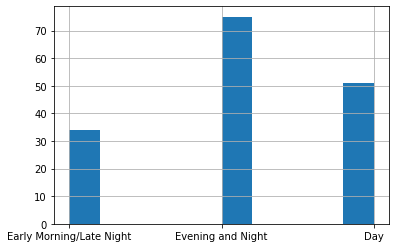

In [22]:
hate_info['time'].hist()

We now want to see if the time of day actually affects the kind of hate crime commited. Below are some statistics that apart from telling us, we need to clean assault, are kind of something we would have expected. Late night crime includes a lot of vandalism and assaults. This might be because people inherently feel they can get away with more dangerous crimes at night.

In [23]:
a= hate_info[hate_info['time']=='Early Morning/Late Night']
a['crime'].value_counts()

vandalism             13
threat                 6
assault, w/weapon      4
assault, no weapon     3
assault                2
other                  2
threat, phone call     2
battery                2
Name: crime, dtype: int64

In [24]:
a= hate_info[hate_info['time']=='Day']
a['crime'].value_counts()

vandalism             18
assault                9
threat                 6
other                  5
assault, no weapon     4
assault, w/weapon      4
robbery                2
threat, phone call     1
bomb threat            1
burglary               1
Name: crime, dtype: int64

In [25]:
a= hate_info[hate_info['time']=='Morning']
a['crime'].value_counts()

Series([], Name: crime, dtype: int64)

In [26]:
# cleaning crime

In [27]:

hate_info['crime'] = hate_info['crime'].str.lower()
#contains('Assault')]
    

### Cleaning assault column because assault is assault as a whole

In [28]:
def conv_assault(ass):
    if 'assault' in ass:
        return 'assault'
    else:
        return ass
hate_info['crime'] = hate_info['crime'].apply(conv_assault)


# Visualizing Type of Crimes by day

In [29]:
#Interesting observation
even= hate_info[hate_info['time']=='Evening and Night']
even['crime'].value_counts()

vandalism             27
assault               24
threat                 8
threat, phone call     7
robbery                3
bomb threat            3
other                  2
burglary               1
Name: crime, dtype: int64

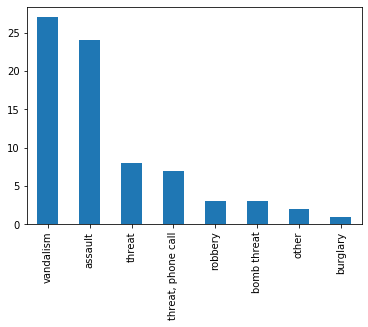

In [30]:
even['crime'].value_counts().plot.bar()

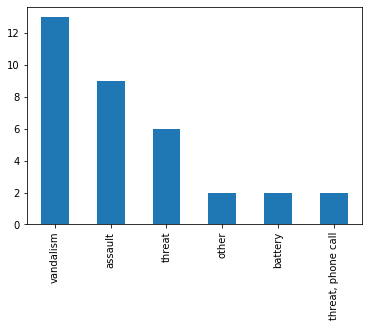

In [31]:
early= hate_info[hate_info['time']=='Early Morning/Late Night']
early['weapon'].value_counts()
early['crime'].value_counts().plot.bar()

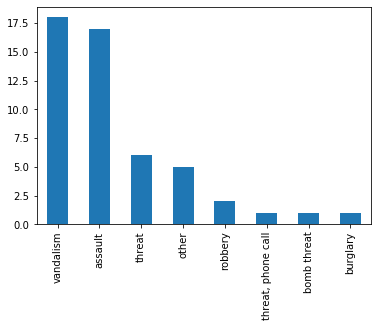

In [32]:
day= hate_info[hate_info['time']=='Day']
day['weapon'].value_counts()
day['crime'].value_counts().plot.bar()

In [33]:
day['crime'].value_counts()

vandalism             18
assault               17
threat                 6
other                  5
robbery                2
threat, phone call     1
bomb threat            1
burglary               1
Name: crime, dtype: int64

# Analysis

After getting an idea of how the data behaves and figuring out majority of how the data works, we still do not where these events occured on a map of San Diego. As we know and have studied in class, one very important technique that takes into account an address and returns a coordinate is known as Geocoding. This converts our address to a coordinate we can plot and see on a map. 

### Blueprint for analysis

The steps involved in this project are
1. Cleaning address to use for GeoCode 
2. Coverting Lat and longitudes to Points on a map for visualization purposes
3. However just knowing the coordinates doesn't help in analysis as much
4. After Geocoding use Join Features with a Zip Code Feature layer to obtain a Zipcode value for each hate crime incident
5. Since a project must include shortcomings , we tried using census tracts data to find the average income of these neighbourhoods, but due to non intersecting boundaries between them and zip codes, we realised the best option to use was GeoEnrichment
6. GeoEnriching zipcode with the census and demographic information to tell us about the areas these crimes occured in
7. Finding out where these areas mostly occur is an important step to suggesting improvements that could be made for this
8. Based on our hypothesis, we will look at base race,(most dominant race of the region) average income and number of hatecrimes occuring
9. Our initial assesment is that areas with a higher diversity(ie lower base race) would have a lower level of hatecrime and areas with higher income would too have a lower level of hate crime
10. Created a density map to find high correlation areas and created scatter plots to test our hypothesis
11. We then correlated our analysis with online reports of these crimes and zipcodes to see if we were in the right direction
12. Looking at last 6 month crime data and seeing if its related to hatecrime

In [34]:
hate_info.head(14)

,case_number,time,crime_code,crime,beat,block,street,type,weapon
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500.0,g,st,"hands, fists, feet"
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400.0,30th,st,stick
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400.0,imperial,av,marker
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100.0,ute,dr,phone
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100.0,university,av,knife
5,16006866,Evening and Night,422.6,vandalism,el cerrito,5800.0,university,av,paint
6,16007286,Evening and Night,422.6,threat,del cerro,6200.0,capri,dr,phone
7,16008581,Evening and Night,422.6,vandalism,college west,5400.0,gilbert,dr,unknown sharp object
8,16008340,Evening and Night,422.6a,assault,lincoln park,500.0,euclid,av,"hands, fists, feet"
9,16008751,Early Morning/Late Night,417a1:m,threat,east village,300.0,park,bl,knife


In [35]:
#onto geocoding
hate_info = hate_info.dropna(subset = ['block'])
len(hate_info)

160

In [36]:
#We still had to clean a lit bt of the block column here

In [37]:
hate_info['block'] = hate_info['block'].apply(lambda x: x[:-2])

In [38]:
hate_info.head(10)

,case_number,time,crime_code,crime,beat,block,street,type,weapon
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet"
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife
5,16006866,Evening and Night,422.6,vandalism,el cerrito,5800,university,av,paint
6,16007286,Evening and Night,422.6,threat,del cerro,6200,capri,dr,phone
7,16008581,Evening and Night,422.6,vandalism,college west,5400,gilbert,dr,unknown sharp object
8,16008340,Evening and Night,422.6a,assault,lincoln park,500,euclid,av,"hands, fists, feet"
9,16008751,Early Morning/Late Night,417a1:m,threat,east village,300,park,bl,knife


In [39]:
#adding all address fields to one column in order to geocode with a high accuracy
hate_info['address'] = hate_info['block'] + " " + hate_info['street'] + " " + hate_info['type']+" "+ 'San Diego, CA'

In [40]:
hate_info.head()
# We can now see the address column

,case_number,time,crime_code,crime,beat,block,street,type,weapon,address
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA"
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA"
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA"
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA"
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA"


# GeoCoding

In [41]:
addresses = list(hate_info['address'])

In [42]:
from arcgis.geocoding import get_geocoders, batch_geocode, geocode

In [43]:
geocoder = get_geocoders(gis)[0]

In [44]:
results = batch_geocode(addresses)

In [45]:
map1 = gis.map("San Diego County, US")
map1

MapView(layout=Layout(height='400px', width='100%'))

In [46]:
for address in results:
    map1.draw(address['location'])

In [47]:
hate_info.head()

,case_number,time,crime_code,crime,beat,block,street,type,weapon,address
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA"
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA"
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA"
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA"
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA"


In [48]:
#creating lists for lat and long and adding them to a pd.series to add to the dataframe as seen below
latitudes = []
longitudes = []
for address in results:
    geocoded = geocode(address)
    longitude = geocoded[0]['attributes']['X']
    latitude = geocoded[0]['attributes']['Y']
    
    latitudes = latitudes + [latitude]
    longitudes = longitudes + [longitude]
    
hate_info['latitude'] = pd.Series(latitudes)
hate_info['longitude'] = pd.Series(longitudes)

In [49]:
hate_info.head(10)

,case_number,time,crime_code,crime,beat,block,street,type,weapon,address,latitude,longitude
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA",32.741139,-117.130148
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA",32.807511,-117.203142
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA",32.748341,-117.163831
5,16006866,Evening and Night,422.6,vandalism,el cerrito,5800,university,av,paint,"5800 university av San Diego, CA",32.749225,-117.072844
6,16007286,Evening and Night,422.6,threat,del cerro,6200,capri,dr,phone,"6200 capri dr San Diego, CA",32.782135,-117.065392
7,16008581,Evening and Night,422.6,vandalism,college west,5400,gilbert,dr,unknown sharp object,"5400 gilbert dr San Diego, CA",32.760023,-117.078470
8,16008340,Evening and Night,422.6a,assault,lincoln park,500,euclid,av,"hands, fists, feet","500 euclid av San Diego, CA",32.710521,-117.085090
9,16008751,Early Morning/Late Night,417a1:m,threat,east village,300,park,bl,knife,"300 park bl San Diego, CA",32.708696,-117.153825


In [50]:
latitude

32.71890748603413

# We now have Lat and Long added to the dataframe. But since they are pandas objects they cannot be used. We import the point constructor from shapely to convert these to a usable co-ordiante

In [51]:
from shapely.geometry import Point
df = hate_info.copy()
df.head()


,case_number,time,crime_code,crime,beat,block,street,type,weapon,address,latitude,longitude
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA",32.741139,-117.130148
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA",32.807511,-117.203142
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA",32.748341,-117.163831


In [52]:
df['Coordinates'] = list(zip(df.longitude, df.latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
df.head()

,case_number,time,crime_code,crime,beat,block,street,type,weapon,address,latitude,longitude,Coordinates
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073,POINT (-117.1600734036998 32.71263809630025)
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA",32.741139,-117.130148,POINT (-117.1301477956986 32.74113929569858)
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812,POINT (-117.1518118106902 32.70634749036676)
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA",32.807511,-117.203142,POINT (-117.2031424172799 32.80751149470067)
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA",32.748341,-117.163831,POINT (-117.1638308764208 32.74834112357916)


In [53]:
hate_info_geo = gpd.GeoDataFrame(df, geometry='Coordinates')
# hate_info_geo.plot(figsize=(10,10), legend = True)
# #new_locations.plot(ax=new_map, legend = True,marker='o', color='black', markersize=100)

# Based on what we just did above, we now have a geodataframe detailing exactly where each hatecrime was reported. This was a big step for us because we had no such information prior to this

In [54]:
hate_info_geo

,case_number,time,crime_code,crime,beat,block,street,type,weapon,address,latitude,longitude,Coordinates
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073,POINT (-117.16007 32.71264)
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA",32.741139,-117.130148,POINT (-117.13015 32.74114)
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812,POINT (-117.15181 32.70635)
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA",32.807511,-117.203142,POINT (-117.20314 32.80751)
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA",32.748341,-117.163831,POINT (-117.16383 32.74834)
5,16006866,Evening and Night,422.6,vandalism,el cerrito,5800,university,av,paint,"5800 university av San Diego, CA",32.749225,-117.072844,POINT (-117.07284 32.74923)
6,16007286,Evening and Night,422.6,threat,del cerro,6200,capri,dr,phone,"6200 capri dr San Diego, CA",32.782135,-117.065392,POINT (-117.06539 32.78214)
7,16008581,Evening and Night,422.6,vandalism,college west,5400,gilbert,dr,unknown sharp object,"5400 gilbert dr San Diego, CA",32.760023,-117.078470,POINT (-117.07847 32.76002)
8,16008340,Evening and Night,422.6a,assault,lincoln park,500,euclid,av,"hands, fists, feet","500 euclid av San Diego, CA",32.710521,-117.085090,POINT (-117.08509 32.71052)
9,16008751,Early Morning/Late Night,417a1:m,threat,east village,300,park,bl,knife,"300 park bl San Diego, CA",32.708696,-117.153825,POINT (-117.15383 32.70870)


In [55]:
#Converting the pd dataframe to sdf for more spatial analysis
hate_info_sdf = pd.DataFrame.spatial.from_xy(hate_info,x_column = 'longitude', y_column = 'latitude')

In [56]:
hate_info_sdf.head()


/opt/conda/lib/python3.7/site-packages/IPython/lib/pretty.py:399: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  return _repr_pprint(obj, self, cycle)
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/html.py:606: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  super().render()


,case_number,time,crime_code,crime,beat,block,street,type,weapon,address,latitude,longitude,SHAPE
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073,"{""x"": -117.16007340369976, ""y"": 32.71263809630..."
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA",32.741139,-117.130148,"{""x"": -117.13014779569856, ""y"": 32.74113929569..."
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812,"{""x"": -117.15181181069018, ""y"": 32.70634749036..."
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA",32.807511,-117.203142,"{""x"": -117.20314241727988, ""y"": 32.80751149470..."
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA",32.748341,-117.163831,"{""x"": -117.16383087642083, ""y"": 32.74834112357..."


In [57]:
# hate_info_fl = hate_info_sdf.spatial.to_featurelayer(title='San Diego Hate Crime',tags = 'hate crime')
# hate_info_fl.share(org=True)

In [58]:
hate_info_fl = gis.content.get('276d89103e164c84be12f07acdf36899')

In [59]:
hate_info_fl = hate_info_fl.layers[0]

In [60]:
hate_info_fl

<FeatureLayer url:"https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/a630f1/FeatureServer/0">

We used the above SDF to convert this to a feature layer that can be plotted

In [61]:
map2 = gis.map('San Diego County, CA')
map2.add_layer(hate_info_fl)

Below is a map of all the coordinates of where the hatecrime occured. This information just tells us about where they occured but little information on the type of area it occured in. We don't know the zipcode or anything about the area to make assumptions of where this occured. So to do this, we need to create a feature layer of zipcodes, combine the two maps using within and obtain a list of all zipcodes where the accidents occured to understand the area of each hatecrime

In [62]:
map2

MapView(layout=Layout(height='400px', width='100%'))

Finding san diego zipcode layer based on gis results

<Item title:"Julian_Minerals_JF" type:Feature Layer Collection owner:schil021>
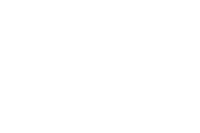

<Item title:"Dog_and_Cat_Households_in_SD_Zips" type:Feature Layer Collection owner:Rizbee>
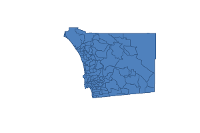

<Item title:"Drank Cola" type:Feature Layer Collection owner:kyle4920@esri.com_manucomm>
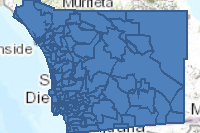

<Item title:"Enriched San Diego County Zip Codes Ness" type:Feature Layer Collection owner:mendo138>
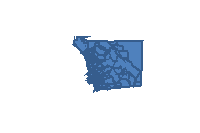

<Item title:"Enriched San Diego County Zip Codes kelvin lee" type:Feature Layer Collection owner:lee139>
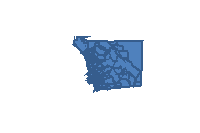

<Item title:"Find_Locations_in_SD_Mineral_Resources_2sk" type:Feature Layer Collection owner:kitch005>
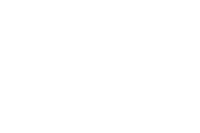

<Item title:"Enriched San Diego County Zip Codes yuki" type:Feature Layer Collection owner:hata002>
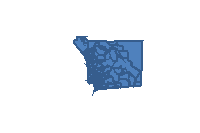

<Item title:"San Diego County Zip Codes" type:Feature Layer Collection owner:samantha.wriker@economicmodeling.com>
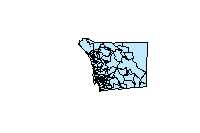

<Item title:"SanDiegoRentalsPerZIP" type:Feature Layer Collection owner:CVaillancourt_EsriMedia>
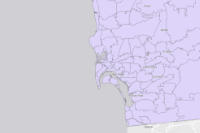

<Item title:"Enriched San Diego County Zip Codes Thehara Ambrose" type:Feature Layer Collection owner:ambro011>
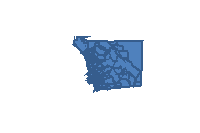

<Item title:"Zips_version2" type:Feature Layer Collection owner:readthemap_NU_Helath>
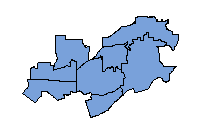

<Item title:"Aggregation_of_Get_it_done_report_2019_to_San_Diego_County_Zip_Codes_San_Diego_County_Zip_Codes" type:Feature Layer Collection owner:sboonvan_UCSDOnline>

<Item title:"enriched San Diego County Zip Codes Claudia Reardon" type:Feature Layer Collection owner:reard005>
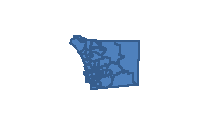

<Item title:"Minerals_in_Julian__JD" type:Feature Layer Collection owner:duran057GIS>
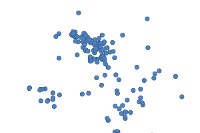

<Item title:"Enriched San Diego County Zip Codes Ben" type:Feature Layer Collection owner:irvin013>
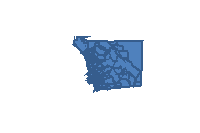

<Item title:"San Diego County Income and Uninsured SN" type:Feature Layer Collection owner:neste003>
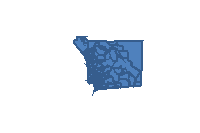

<Item title:"Minerals_in_Julian___TW" type:Feature Layer Collection owner:snyde051>
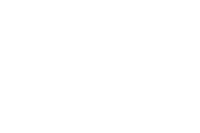

<Item title:"Minerals_in_Julian_JJ" type:Feature Layer Collection owner:josep022>
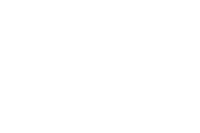

<Item title:"SAN DIEGO COUNTY ZIP CODES-INCOME AND UNINSURED JH" type:Feature Layer Collection owner:herna380>
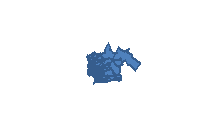

<Item title:"ZIP Code Points to San Diego County Chronic Alcohol ED Discharge Data 2010 through 2013" type:Feature Layer Collection owner:woods043>
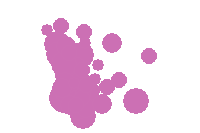

<Item title:"Total Population vs. Minority Population OL" type:Feature Layer Collection owner:lara019>
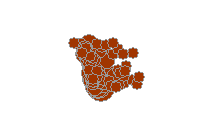

<Item title:"San Diego ZIP Code Tech Data" type:Feature Layer Collection owner:Matt.Kaufman@am.jll.com_JLL>

<Item title:"Enriched San Diego County Zip Codes Benjamin Santia" type:Feature Layer Collection owner:santi043>
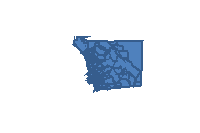

<Item title:"Zip_Codes" type:Feature Layer Collection owner:lsmith132>
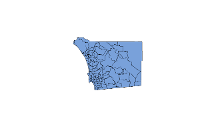

<Item title:"San_Diego_County___Male_5__19___Female_5___19" type:Feature Layer Collection owner:pijpa001>
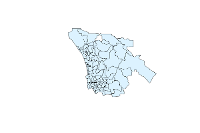

<Item title:"Enriched San Diego County Zip Codes Moses" type:Feature Layer Collection owner:wosk002>
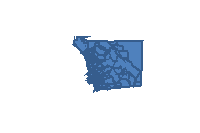

<Item title:"Enriched San Diego County Zip Codes-GREGORIA" type:Feature Layer Collection owner:santi028>
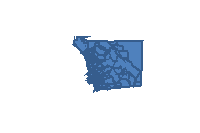

<Item title:"Dissolve_San_Diego_County_Zip_Codes" type:Feature Layer Collection owner:kireyes_UCSDOnline>
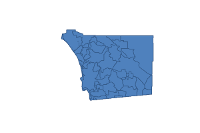

<Item title:"Zip Code" type:Feature Layer Collection owner:PowayGIS>
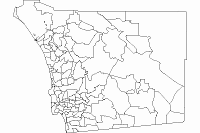

<Item title:"ZIP_CODES_SummarizeWithin" type:Feature Layer Collection owner:SuzannLeininger>
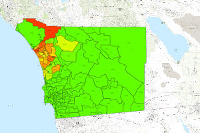

In [63]:
result = gis.content.search('San Diego Zip Codes' , item_type="Feature Layer", outside_org=True, max_items=30)
result
from IPython.display import display
for item in result:
    display(item)

In [64]:
zip_codes = gis.content.get('15e4d8d850674b0a8293e4d91978ae95').layers[0]

# Adding zipcodes to the abive gis map

In [65]:
map2.add_layer(zip_codes)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [66]:
# col_zip_code = arcgis.join_features(hate_info_fl,zip_codes,spatial_relationship = 'within',output_name = "finalprooup")
# col_zip_code.share(org = True)

In [67]:
col_zip_code = gis.content.get('bcf72961387f456f8c56f60f360c4802')

In [68]:
map3 = gis.map('San Diego County, CA')
map3.add_layer(hate_info_fl)
map3.add_layer(col_zip_code)

In [69]:
map3

MapView(layout=Layout(height='400px', width='100%'))

Col Zip Code is all hate crimes with a zip code attached. We now know where the crimes occured geographically and the area they occured in as well.

In [238]:
col_zip_code = col_zip_code.layers[0].query().sdf


In [236]:
hate_crime_by_zipcode = pd.DataFrame(col_zip_code.groupby('ZIP').sum().Join_Count)


In [237]:
hate_crime_by_zipcode.sort_values(by='Join_Count',ascending = False).head(10)

,Join_Count
ZIP,
92101,20
92103,12
92037,11
92102,11
92110,10
92115,10
92104,9
92116,8
92111,7


In [239]:
col_zip_code.head()

,OBJECTID,Join_Count,case_numbe,time,crime_code,crime,beat,block,street,type,...,address,latitude,longitude,ZIP,COMMUNITY,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,SHAPE
0,1,1,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,...,"500 g st San Diego, CA",32.712638,-117.160073,92101,San Diego,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{""x"": -13042199.7126, ""y"": 3857223.2990000024,..."
1,2,1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,...,"3400 30th st San Diego, CA",32.741139,-117.130148,92104,San Diego,9.247708e+07,44329.073250,1.217787e+07,16090.264426,"{""x"": -13038868.4092, ""y"": 3860994.7250000015,..."
2,3,1,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,...,"1400 imperial av San Diego, CA",32.706347,-117.151812,92101,San Diego,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{""x"": -13041280.0363, ""y"": 3856391.0559, ""spat..."
3,4,1,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,...,"4100 ute dr San Diego, CA",32.807511,-117.203142,92117,San Diego,2.419047e+08,78195.217413,3.191454e+07,28394.157492,"{""x"": -13046994.133299999, ""y"": 3869782.116499..."
4,5,1,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,...,"100 university av San Diego, CA",32.748341,-117.163831,92103,San Diego,1.012375e+08,57977.990851,1.333285e+07,21037.430975,"{""x"": -13042617.992600001, ""y"": 3861947.898900..."


We now turned to the crime data collected over the last 6 months to see if any of the zipcodes matched. We found that the top zipcode 92101 was common for both and made this focal point fo our presentation and analysis

In [74]:
crime_data_zip = pd.DataFrame(crime_data.groupby('ZipCode').count())
#crime_data_zip

In [75]:
crime_data_zip.sort_values(by = 'CM_LEGEND',ascending =  False).head(10)

,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,community
ZipCode,,,,,,
92101.0,5225,5225,5225,5225,5225,5094
92109.0,2602,2602,2602,2602,2602,2505
92054.0,2066,2066,2066,2066,2066,1982
92020.0,1620,1620,1620,1620,1620,1574
92113.0,1575,1575,1575,1575,1575,1546
92110.0,1509,1509,1509,1509,1509,1473
92025.0,1497,1497,1497,1497,1497,1496
91910.0,1491,1491,1491,1491,1491,1417
91911.0,1453,1453,1453,1453,1453,1400


In [76]:
crime_data

,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
0,THEFT/LARCENY,OCEANSIDE,PETTY THEFT(All Other Larceny) (M),12/29/2019 18:11:00,1800 BLOCK COLLEGE BOULEVARD,92056.0,OCEANSIDE
1,THEFT/LARCENY,CHULA VISTA,PETTY THEFT(Shoplift) (M),1/2/2020 20:15:00,600 BLOCK PALOMAR STREET,91911.0,CHULA VISTA
2,DUI,SAN DIEGO,DUI ALC/0.08 PERCENT (M),1/1/2020 2:36:00,4000 BLOCK RUEDA DRIVE,92124.0,SAN DIEGO
3,MOTOR VEHICLE THEFT,CHULA VISTA,TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT...,1/6/2020 17:00:00,1200 BLOCK ATWATER STREET,91913.0,CHULA VISTA
4,DRUGS/ALCOHOL VIOLATIONS,ESCONDIDO,POSSESS CONTROLLED SUBSTANCE (M),12/28/2019 20:00:00,500 W BLOCK WASHINGTON AVENUE,92025.0,ESCONDIDO
5,WEAPONS,ESCONDIDO,MANUFACTURE/SALE/POSSESS/ETC METAL KNUCKLES (F),12/28/2019 20:00:00,500 W BLOCK WASHINGTON AVENUE,92025.0,ESCONDIDO
6,DUI,ESCONDIDO,DUI ALCOHOL (M),12/29/2019 0:21:00,LAKE WOHLFORD ROAD & E VALLEY PARKWAY,92027.0,ESCONDIDO
7,BURGLARY,EL CAJON,BURGLARY (RESIDENTIAL) (F),1/2/2020 15:00:00,1300 BLOCK NARANCA AVENUE,92021.0,EL CAJON
8,DUI,SHERIFF,DUI ALCOHOL (M),10/13/2019 2:50:00,6700 BLOCK SAN MIGUEL AVENUE,91945.0,LEMON GROVE
9,FRAUD,SAN DIEGO,THEFT BY USE OF ACCESS CARD INFORMATION [OVER ...,12/21/2019 14:45:00,9800 BLOCK HIBERT STREET,92131.0,SAN DIEGO


In [77]:
#Looking at victims and suspects in zipcode 92101
high_crime_zip = col_zip_code[col_zip_code['ZIP']==92101]
high_crime_zip.head()

,OBJECTID,Join_Count,case_numbe,time,crime_code,crime,beat,block,street,type,...,address,latitude,longitude,ZIP,COMMUNITY,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,SHAPE
19,20,1,16024587,Day,245a1,assault,teralta east,4100,fairmount,av,...,"4100 fairmount av San Diego, CA",32.751621,-117.100905,92105,San Diego,1.533141e+08,65485.48112,2.018697e+07,23765.440339,"{""x"": -13035613.1699, ""y"": 3862382.0216000006,..."
39,40,1,16046634,Evening and Night,422.6,assault,cherokee point,3900,landis,st,...,"3900 landis st San Diego, CA",32.745998,-117.110579,92105,San Diego,1.533141e+08,65485.48112,2.018697e+07,23765.440339,"{""x"": -13036690.070799999, ""y"": 3861637.774599..."
67,68,1,17015573,Day,459f & 594,burglary,el cerrito,5400,lea,st,...,"5400 lea st San Diego, CA",32.745911,-117.079460,92105,San Diego,1.533141e+08,65485.48112,2.018697e+07,23765.440339,"{""x"": -13033225.9117, ""y"": 3861626.2754999995,..."
90,91,1,18003081,Evening and Night,594(a),vandalism,fox canyon,3800,winona,ave,...,"3800 winona ave San Diego, CA",32.747130,-117.088068,92105,San Diego,1.533141e+08,65485.48112,2.018697e+07,23765.440339,"{""x"": -13034184.1334, ""y"": 3861787.5434999987,..."
124,125,1,18035021,Day,245a1,assault,colina del sol,5000,university,av,...,"5000 university av San Diego, CA",32.749398,-117.086897,92105,San Diego,1.533141e+08,65485.48112,2.018697e+07,23765.440339,"{""x"": -13034053.757199999, ""y"": 3862087.758900..."


Getting a list of case ID's to see which ones occured in respective zipcodes to see kind of crime occuring there

In [78]:
case_id = list(high_crime_zip['case_numbe'])

In [79]:
case_id

['16024587',
 '16046634',
 '17015573',
 '18003081',
 '18035021',
 '18037683',
 '19024491']

In [80]:
case_df = hate_crime.where(hate_crime['case_number'].isin(case_id))
case_df = case_df.dropna(how='all')

In [81]:
case_df[['motivation', 'number_of_suspects', 'suspect', 'victim_count',
       'victim_other', 'injury', 'suspect_race_0', 'suspect_race_1',
       'suspect_race_2', 'suspect_sex_0', 'suspect_sex_1', 'suspect_sex_2',
       'victim_race_0', 'victim_race_1', 'victim_race_2', 'victim_sex_0',
       'victim_sex_1', 'victim_sex_2']]

,motivation,number_of_suspects,suspect,victim_count,victim_other,injury,suspect_race_0,suspect_race_1,suspect_race_2,suspect_sex_0,suspect_sex_1,suspect_sex_2,victim_race_0,victim_race_1,victim_race_2,victim_sex_0,victim_sex_1,victim_sex_2
19,Race,3,Unknown,1.0,NaN,Hospital,A,A,A,M,M,M,B,NaN,NaN,M,NaN,NaN
39,Race,1,Unknown,2.0,NaN,Treated,B,NaN,NaN,F,NaN,NaN,H,H,NaN,F,M,NaN
68,Race,Unk,Unknown,1.0,Business,None,Unk,NaN,NaN,Unk,NaN,NaN,B,NaN,NaN,F,NaN,NaN
91,Religion,6,Known,2.0,NaN,None,B,B,B,M,M,F,O,O,NaN,F,F,NaN
125,Race,1,Known,2.0,NaN,Treated,B,NaN,NaN,F,NaN,NaN,H,H,NaN,F,M,NaN
126,Sexual Orientation,2,Known,1.0,NaN,None,W,W,NaN,F,M,NaN,W,NaN,NaN,M,NaN,NaN
147,Race,1,Known,2.0,NaN,None,B,NaN,NaN,M,NaN,NaN,H,H,NaN,F,F,NaN


# Finding Average Income based on Census Tract data

### Side Note: After completing our analysis we figured out that census tracts was not the best measure as we could enrich zipcodes and tracts and zipcode boundaries do not intersect. This led to us using geo-enrichment on the zipcodes as you will see below

In [83]:
census_tracts = gpd.read_file('Census/CENSUS_TRACTS_2010.shp')
demographics = pd.read_excel('socio-demographic.xlsx')

In [84]:
census_tracts.head()

,TRACT,SHAPE_AREA,SHAPE_LEN,geometry
0,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297..."
1,16.0,7.407379e+06,11329.616060,"POLYGON ((6292472.285 1855719.495, 6292503.644..."
2,17.0,6.714940e+06,10791.678584,"POLYGON ((6292613.597 1857793.035, 6292669.857..."
3,18.0,8.036708e+06,13929.689427,"POLYGON ((6297364.831 1858582.740, 6297395.566..."
4,19.0,1.796665e+07,21026.710682,"POLYGON ((6296136.003 1863452.471, 6296242.697..."


In [85]:
demographics.head()

,TRACT,YEAR,ORDINAL,INCOME GROUP,HOUSEHOLDS
0,1.0,2011,1,"Less than $15,000",64
1,1.0,2011,2,"$15,000 to $29,999",2
2,1.0,2011,3,"$30,000 to $44,999",12
3,1.0,2011,4,"$45,000 to $59,999",174
4,1.0,2011,5,"$60,000 to $74,999",97


In [86]:
merged = census_tracts.merge(demographics, on='TRACT')
merged.head()

,TRACT,SHAPE_AREA,SHAPE_LEN,geometry,YEAR,ORDINAL,INCOME GROUP,HOUSEHOLDS
0,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,1,"Less than $15,000",268
1,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,2,"$15,000 to $29,999",219
2,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,3,"$30,000 to $44,999",276
3,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,4,"$45,000 to $59,999",264
4,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,5,"$60,000 to $74,999",191


In [87]:
d = {'Less than $15,000': 7500,
    '$15,000 to $29,999': 22500,
    '$30,000 to $44,999': 37500,
    '$45,000 to $59,999': 52500,
    '$60,000 to $74,999': 67500,
    '$75,000 to $99,999': 82500,
    '$100,000 to $124,999': 115000,
    '$125,000 to $149,999': 132500,
    '$150,000 to $199,999': 175000,
    '$200,000 or more': 200000 }

In [88]:
avg_income_tract = merged
avg_income_tract['INCOME'] = avg_income_tract['INCOME GROUP'].map(d)

In [89]:
merged.head()

,TRACT,SHAPE_AREA,SHAPE_LEN,geometry,YEAR,ORDINAL,INCOME GROUP,HOUSEHOLDS,INCOME
0,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,1,"Less than $15,000",268,7500
1,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,2,"$15,000 to $29,999",219,22500
2,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,3,"$30,000 to $44,999",276,37500
3,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,4,"$45,000 to $59,999",264,52500
4,15.0,8.693887e+06,12443.272111,"POLYGON ((6293438.095 1853304.830, 6293503.297...",2011,5,"$60,000 to $74,999",191,67500


In [90]:
avg_income_tract['totals']= avg_income_tract['HOUSEHOLDS']*avg_income_tract['INCOME']

In [91]:
average_income = sum(avg_income_tract['totals']) / sum(avg_income_tract['HOUSEHOLDS'])

In [92]:
avg_income_tract= avg_income_tract[['HOUSEHOLDS', 'INCOME', 'totals', 'TRACT','geometry']]


Calculating the average income per family in each tract

In [93]:
avg_income_tract.head()

,HOUSEHOLDS,INCOME,totals,TRACT,geometry
0,268,7500,2010000,15.0,"POLYGON ((6293438.095 1853304.830, 6293503.297..."
1,219,22500,4927500,15.0,"POLYGON ((6293438.095 1853304.830, 6293503.297..."
2,276,37500,10350000,15.0,"POLYGON ((6293438.095 1853304.830, 6293503.297..."
3,264,52500,13860000,15.0,"POLYGON ((6293438.095 1853304.830, 6293503.297..."
4,191,67500,12892500,15.0,"POLYGON ((6293438.095 1853304.830, 6293503.297..."


In [94]:
avg_income_tract.columns

Index(['HOUSEHOLDS', 'INCOME', 'totals', 'TRACT', 'geometry'], dtype='object')

In [95]:
avg_income_tract = avg_income_tract.groupby(['TRACT'], as_index = False).sum()

In [96]:
avg_income_tract['average'] = avg_income_tract['totals'] / avg_income_tract['HOUSEHOLDS']

In [97]:
avg_income_tract[avg_income_tract['TRACT']==33.04]

,TRACT,HOUSEHOLDS,INCOME,totals,average
75,33.04,6868,6247500,267615000,38965.492137


Creating a dictionary of census tract and geometry to try and find intersections as will be observed later

In [98]:
# #merge avg_income_tract and merged on TRACT and get geometry ad dtop
# a = avg_income_tract.merge(merged,on = 'TRACT',how='right')
# a.head()
a = merged.copy()
a = a[['TRACT','geometry']]
geom = a.set_index('TRACT').to_dict()['geometry']
geom

{15.0: <shapely.geometry.polygon.Polygon at 0x7fc2bd03f128>,
 16.0: <shapely.geometry.polygon.Polygon at 0x7fc2bd03f048>,
 17.0: <shapely.geometry.polygon.Polygon at 0x7fc2bd03ffd0>,
 18.0: <shapely.geometry.polygon.Polygon at 0x7fc3694c4438>,
 19.0: <shapely.geometry.polygon.Polygon at 0x7fc2bd10e240>,
 20.01: <shapely.geometry.polygon.Polygon at 0x7fc2bd10e1d0>,
 20.02: <shapely.geometry.polygon.Polygon at 0x7fc2bd184f60>,
 21.0: <shapely.geometry.polygon.Polygon at 0x7fc2bd184438>,
 22.01: <shapely.geometry.polygon.Polygon at 0x7fc369551c18>,
 22.02: <shapely.geometry.polygon.Polygon at 0x7fc2bd10b278>,
 23.01: <shapely.geometry.polygon.Polygon at 0x7fc373012ef0>,
 23.02: <shapely.geometry.polygon.Polygon at 0x7fc3730128d0>,
 24.01: <shapely.geometry.polygon.Polygon at 0x7fc2bd039f28>,
 24.02: <shapely.geometry.polygon.Polygon at 0x7fc2bd039160>,
 25.01: <shapely.geometry.polygon.Polygon at 0x7fc2bd0d5160>,
 25.02: <shapely.geometry.polygon.Polygon at 0x7fc2bd0d5048>,
 26.01: <shape

In [99]:
avg_income_tract['geometry']=avg_income_tract['TRACT'].map(geom)

In [100]:
avg_income_tract= avg_income_tract[['TRACT','average','geometry']]
avg_income_tract.head()

,TRACT,average,geometry
0,1.00,122181.441189,"POLYGON ((6273121 1857292, 6273168.000249997 1..."
1,2.01,91811.231680,"POLYGON ((6278383.999750003 1856813, 6278375 1..."
2,2.02,88669.357402,"POLYGON ((6276705.420750007 1854067.768000007,..."
3,3.00,73456.245067,"POLYGON ((6279822.865999997 1853534.077999994,..."
4,4.00,63765.879614,"POLYGON ((6281407.650000006 1857087.834999993,..."


In [101]:
#avg_income_tract['avg income'] = average_income

In [102]:
avg_income_tract.head(10)

,TRACT,average,geometry
0,1.00,122181.441189,"POLYGON ((6273121 1857292, 6273168.000249997 1..."
1,2.01,91811.231680,"POLYGON ((6278383.999750003 1856813, 6278375 1..."
2,2.02,88669.357402,"POLYGON ((6276705.420750007 1854067.768000007,..."
3,3.00,73456.245067,"POLYGON ((6279822.865999997 1853534.077999994,..."
4,4.00,63765.879614,"POLYGON ((6281407.650000006 1857087.834999993,..."
5,5.00,72611.013986,"POLYGON ((6287139.963 1859651.998750001, 62871..."
6,6.00,68049.249638,"POLYGON ((6282762.033999994 1856530.594999999,..."
7,7.00,70227.037556,"POLYGON ((6285023.987000003 1853290.105000004,..."
8,8.00,56432.246029,"POLYGON ((6286120.351750001 1853275.568000004,..."
9,9.00,44801.843870,"POLYGON ((6286578.569000006 1855755.341000006,..."


In [103]:
avg_income_tract = gpd.GeoDataFrame(avg_income_tract,geometry='geometry')

In [104]:
avg_income_tract.crs = {'init':'epsg:2230'}

<Item title:"Tracts Within 1 Mile Wilshire Blvd (UC 2015)" type:Feature Layer Collection owner:bwszukalski>
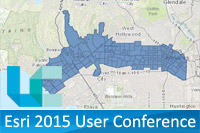

<Item title:"Census Tracts 2010" type:Feature Layer Collection owner:ewendt>
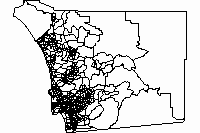

<Item title:"GEOG320_RichardsonH_RoadsHighways" type:Feature Layer Collection owner:richa119>

<Item title:"Barrio_Logan_MAD_WFL1" type:Feature Layer Collection owner:tysterns>
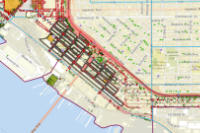

<Item title:"San Diego Census Tracts 2" type:Feature Layer Collection owner:itzai001>
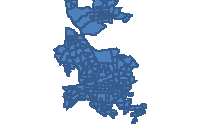

<Item title:"schools_near_parks_with_80_crime" type:Feature Layer Collection owner:issey.10176@mycpms.net>
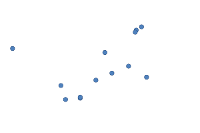

<Item title:"CENSUS TRACTS San Diego 2010" type:Feature Layer Collection owner:izaslavsky_ucsd>
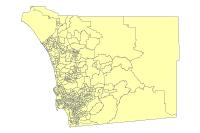

<Item title:"San_Diego_CA" type:Feature Layer Collection owner:IDM800002143_ohiostate>
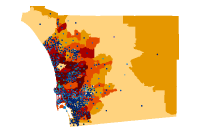

<Item title:"Total Crime Index by Census Tract  2016 San Diego County" type:Feature Layer Collection owner:Rizbee>
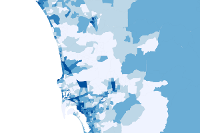

<Item title:"City of Escondido Roads" type:Feature Layer Collection owner:pjhickman>
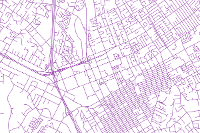

<Item title:"San Diego Census 4" type:Feature Layer Collection owner:itzai001>
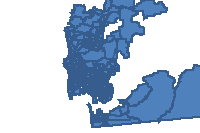

<Item title:"nhgis0001_shapefile_tl2010_us_county_2010" type:Feature Layer Collection owner:lmd003_UCSDOnline7>

<Item title:"Census Tracts - Wilshire Blvd 1-mile Buffer" type:Feature Layer Collection owner:bwszukalski>
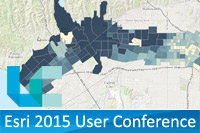

<Item title:"2012_AutoThefts_by_Census_Tract_San_Diego" type:Feature Layer Collection owner:JennyBradyMesaAGO>
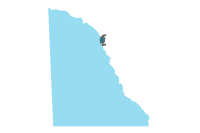

<Item title:"San_Diego_Internet_accessmarch3" type:Feature Layer Collection owner:mgg027_UCSDOnline>
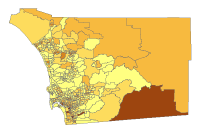

<Item title:"2010 Household Size" type:Feature Layer Collection owner:riple005>
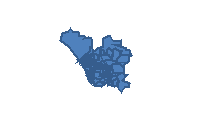

<Item title:"Poverty Level 2010" type:Feature Layer Collection owner:riple005>
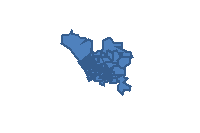

<Item title:"Intersect_of_CENSUS_TRACTS_2010_and_San_Diego_Council_District_4" type:Feature Layer Collection owner:baxamusa>
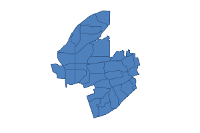

<Item title:"Minority Population 2010" type:Feature Layer Collection owner:riple005>
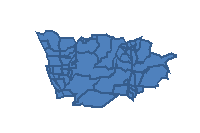

<Item title:"San Diego Public Health Data" type:Feature Layer Collection owner:j6yoon_ucsd>
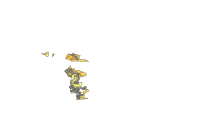

<Item title:"Vehicle Ownership" type:Feature Layer Collection owner:riple005>
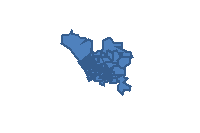

<Item title:"San Diego Census Tracts" type:Feature Layer Collection owner:itzai001>
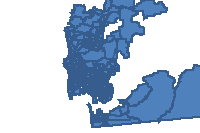

<Item title:"San Diego Census Tract 3" type:Feature Layer Collection owner:itzai001>
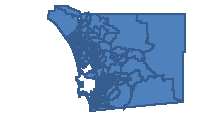

<Item title:"San_Diego_Heart_Attack_and_Heart_Disease_2017" type:Feature Layer Collection owner:Rizbee>
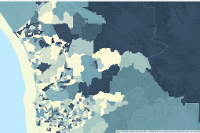

<Item title:"FoodInsecurity" type:Feature Layer Collection owner:whcheung>
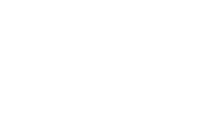

<Item title:"CENSUS_TRACTS_2010" type:Feature Layer Collection owner:YMCACRS>
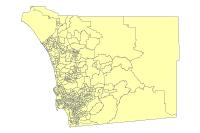

<Item title:"Intersect_of_San_Diego_Council_District_4_and_CENSUS_TRACTS_2010" type:Feature Layer Collection owner:baxamusa>
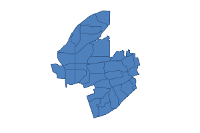

<Item title:"Intersect_of_CENSUS_TRACTS_2010_and_San_Diego_Council_District_8" type:Feature Layer Collection owner:baxamusa>
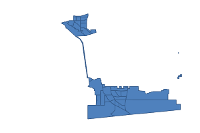

<Item title:"homeless_numbers" type:Feature Layer Collection owner:utgraphics>

<Item title:"San Diego County Census  Tracts" type:Feature Layer Collection owner:Rizbee>
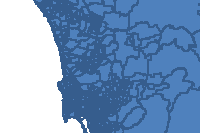

In [105]:
result = gis.content.search('Census Tracts, San Diego ' , item_type="Feature Layer", outside_org=True, max_items=30)
result
from IPython.display import display
for item in result:
    display(item)

In [106]:
crime_by_tract = gis.content.get('684e982fac8c42a09c47118e6c422bec')

In [240]:
#Using GIS features we were exploring to see different crimes by zipcode.

In [107]:
map5 = gis.map('San Diego County, CA')
map5.add_layer(crime_by_tract)
map5.legend = True
map5

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [108]:
#avg_income_tract.to_file('Average_Income_Updated.shp')

In [109]:
avg_income_tract.crs

{'init': 'epsg:2230'}

In [110]:
avg_income_tract_fl = gis.content.get('597a1b82e98b4dcaba3c6c7c3934b67e').layers[0]

<Item title:"Proj_Avg_Income" type:Feature Layer Collection owner:aubarrio_ucsd5>
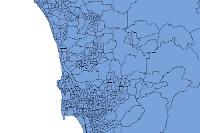

In [111]:
a = gis.content.get('597a1b82e98b4dcaba3c6c7c3934b67e')
a

In [112]:
# avg_income_tract_sdf = avg_income_tract_fl.query().sdf

In [113]:
map6 = gis.map('San Diego County, CA')
#map6.add_layer(avg_income_zip_code)
#map6

In [114]:
#avg_income_tract_sdf

In [115]:
#avg_income_tract

In [116]:
#type(avg_income_tract_sdf)

In [117]:
#avg_income_tract_sdf.to_csv("avg_income")

In [118]:
# avg_income_zip_code = arcgis.join_features(zip_codes,avg_income_tract_fl, spatial_relationship = 'within',output_name = "projectPJAB_AverageUpdated")
# avg_income_zip_code.share(org = True)

Below we tried to merge zipcode and census tract only to fond out they only intersected at one boundary thereby making what we did above not useful in context of the project

In [119]:
avg_income_zip_code = gis.content.get('619cf53fd8784a958ab5f30196f6f781')

In [120]:
avg_income_zip_code

<Item title:"projectPJAB_AverageUpdated" type:Feature Layer Collection owner:pjuneja_ucsd5>

In [121]:
b = avg_income_zip_code.layers[0].query().sdf

In [122]:
b

,OBJECTID,Join_Count,ZIP,COMMUNITY,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,TRACT,average,Shape__Area_1,Shape__Length_1,SHAPE
0,1,1,92056,Oceanside,4.948242e+00,52.440204,6.601562e-01,19.100803,185.14,86743.634548,5.872626e+06,10370.861595,"{""rings"": [[[-13056857.5549, 3925275.1411], [-..."
1,2,1,92058,Camp Pendleton,2.201062e+06,6038.244965,2.935304e+05,2205.572596,187.00,48908.269031,7.827174e+08,139452.109614,"{""rings"": [[[-13058334.5401, 3935498.2375], [-..."
2,3,1,92058,Camp Pendleton,4.808182e+06,9232.450459,6.418915e+05,3375.201143,187.00,48908.269031,7.827174e+08,139452.109614,"{""rings"": [[[-13060014.2171, 3940825.775], [-1..."
3,4,1,92058,Camp Pendleton,6.818365e+06,10959.779040,9.098164e+05,4002.988363,187.00,48908.269031,7.827174e+08,139452.109614,"{""rings"": [[[-13058573.5418, 3939058.3987], [-..."
4,5,1,92058,Camp Pendleton,1.174368e+07,14854.188451,1.564434e+06,5422.823089,187.00,48908.269031,7.827174e+08,139452.109614,"{""rings"": [[[-13069064.7073, 3928086.4517], [-..."
5,6,1,92155,Coronado,8.588175e+06,16251.173722,1.129188e+06,5894.197663,216.00,79190.594785,1.975226e+07,20636.152152,"{""rings"": [[[-13043191.828, 3852170.1938], [-1..."


In [123]:
b[b['ZIP']==92056]

,OBJECTID,Join_Count,ZIP,COMMUNITY,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,TRACT,average,Shape__Area_1,Shape__Length_1,SHAPE
0,1,1,92056,Oceanside,4.948242,52.440204,0.660156,19.100803,185.14,86743.634548,5.872626e+06,10370.861595,"{""rings"": [[[-13056857.5549, 3925275.1411], [-..."


In [124]:
# zip_income = list(b['ZIP'])

In [125]:
#cdf = crime_data.where(b['ZIP'].isin(zip_income))
#case_df = case_df.dropna(how='all')

In [126]:
crime_data[crime_data['ZipCode']==92056]

,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
0,THEFT/LARCENY,OCEANSIDE,PETTY THEFT(All Other Larceny) (M),12/29/2019 18:11:00,1800 BLOCK COLLEGE BOULEVARD,92056.0,OCEANSIDE
70,DRUGS/ALCOHOL VIOLATIONS,OCEANSIDE,POSS CONTROLLED SUBS PARAPHERNALIA (M),1/2/2020 23:00:00,COLLEGE BOULEVARD & PLAZA DRIVE,92056.0,OCEANSIDE
79,THEFT/LARCENY,OCEANSIDE,PETTY THEFT(All Other Larceny) (M),12/11/2019 20:21:00,3400 BLOCK MARRON ROAD,92056.0,OCEANSIDE
87,MOTOR VEHICLE THEFT,OCEANSIDE,TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT...,1/29/2020 16:00:00,3300 BLOCK EL CORAZON DRIVE,92056.0,OCEANSIDE
89,ASSAULT,OCEANSIDE,ASSAULT W/DEADLY WEAPON:NOT F/ARM (F),2/1/2020 17:30:00,4100 BLOCK OCEANSIDE BOULEVARD,92056.0,OCEANSIDE
91,VANDALISM,OCEANSIDE,VANDALISM ($400 OR MORE) (F),1/5/2020 19:59:00,4100 BLOCK MARVIN STREET,92056.0,OCEANSIDE
226,SEX CRIMES,OCEANSIDE,RAPE:VIC INCAPABLE OF GIVING CONSENT (F),2/3/2020 4:00:00,3700 BLOCK NORTH WAY,92056.0,OCEANSIDE
310,THEFT/LARCENY,OCEANSIDE,PETTY THEFT(All Other Larceny) (M),1/4/2020 19:00:00,3300 BLOCK GOLFERS DRIVE,92056.0,OCEANSIDE
515,WEAPONS,SHERIFF,CARRY CONCEALED DIRK OR DAGGER (M),1/15/2020 10:30:00,FRAZEE ROAD & OLD GROVE ROAD,92056.0,OCEANSIDE
579,FRAUD,OCEANSIDE,THEFT BY USE OF ACCESS CARD INFORMATION [$950 ...,1/22/2020 13:00:00,3400 BLOCK MARRON ROAD,92056.0,OCEANSIDE


In [127]:
hate_info_sdf.head()



,case_number,time,crime_code,crime,beat,block,street,type,weapon,address,latitude,longitude,SHAPE
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073,"{""x"": -117.16007340369976, ""y"": 32.71263809630..."
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA",32.741139,-117.130148,"{""x"": -117.13014779569856, ""y"": 32.74113929569..."
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812,"{""x"": -117.15181181069018, ""y"": 32.70634749036..."
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA",32.807511,-117.203142,"{""x"": -117.20314241727988, ""y"": 32.80751149470..."
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA",32.748341,-117.163831,"{""x"": -117.16383087642083, ""y"": 32.74834112357..."


In [128]:
hate_crime_by_zipcode.head()

,Join_Count
ZIP,
91910,1
91950,1
92037,11
92101,20
92102,11


# GEOENRICHMENT

In [129]:
from arcgis.geoenrichment import standard_geography_query,enrich

##### After our work above we realised we had to change the approach of finding out more about our zipcodes and this is where zipcodes came into account

In [130]:
avg_income_tract.spatial.set_geometry='geometry'

In [131]:
def geo(zipcode):
    return standard_geography_query(source_country = 'US',layers = ['US.ZIP5'],
                                    geoquery=zipcode, return_geometry = True
    ).iloc[[0]]

<Item title:"Proj_Avg_Income" type:Feature Layer Collection owner:aubarrio_ucsd5>
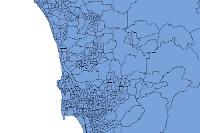

In [132]:
a

In [133]:
zcode = col_zip_code.ZIP.unique().astype(int).astype(str).tolist()



In [134]:
zip_geo = list(map(geo,zcode))

In [135]:
zip_data = pd.concat(zip_geo)

In [136]:
col_zip_code.head()

,OBJECTID,Join_Count,case_numbe,time,crime_code,crime,beat,block,street,type,...,address,latitude,longitude,ZIP,COMMUNITY,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,SHAPE
0,1,1,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,...,"500 g st San Diego, CA",32.712638,-117.160073,92101,San Diego,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{""x"": -13042199.7126, ""y"": 3857223.2990000024,..."
1,2,1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,...,"3400 30th st San Diego, CA",32.741139,-117.130148,92104,San Diego,9.247708e+07,44329.073250,1.217787e+07,16090.264426,"{""x"": -13038868.4092, ""y"": 3860994.7250000015,..."
2,3,1,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,...,"1400 imperial av San Diego, CA",32.706347,-117.151812,92101,San Diego,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{""x"": -13041280.0363, ""y"": 3856391.0559, ""spat..."
3,4,1,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,...,"4100 ute dr San Diego, CA",32.807511,-117.203142,92117,San Diego,2.419047e+08,78195.217413,3.191454e+07,28394.157492,"{""x"": -13046994.133299999, ""y"": 3869782.116499..."
4,5,1,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,...,"100 university av San Diego, CA",32.748341,-117.163831,92103,San Diego,1.012375e+08,57977.990851,1.333285e+07,21037.430975,"{""x"": -13042617.992600001, ""y"": 3861947.898900..."


This is how we enriched each row to get the value we needed

In [137]:
bus = pd.concat(map(
    lambda studyrow: enrich(studyrow[1].to_frame().T, ["Demographic_and_Income_Profile_rep"]),
    zip_data.iterrows()
))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [138]:
bus.columns

Index(['AreaID', 'AreaName', 'CountryAbbr', 'DataLayerID', 'DatasetID',
       'FAMRATE', 'FAMRATE_S', 'HHRATE', 'HHRATE_S', 'HINC0_FY', 'HINC100_FY',
       'HINC150_FY', 'HINC15_FY', 'HINC200_FY', 'HINC25_FY', 'HINC35_FY',
       'HINC50_FY', 'HINC75_FY', 'HINCBASECY', 'HINCBASEFY', 'HasData', 'ID',
       'INCRATE', 'INCRATE_S', 'MajorSubdivisionAbbr', 'MajorSubdivisionName',
       'MajorSubdivisionType', 'OBJECTID_0', 'OWNRATE', 'OWNRATE_S',
       'ObjectId', 'POPRATE', 'POPRATE_S', 'RACEBASE10', 'RACEBASECY',
       'RACEBASEFY', 'SHAPE', 'Score', 'aggregationMethod',
       'apportionmentConfidence', 'populationToPolygonSizeRating',
       'sourceCountry'],
      dtype='object')

After reading online about each of these columns, we decided to take these ones into account which were more inline with our hypothesis

In [139]:
other_details = bus[['AreaID','HasData', 'ID',
       'INCRATE', 'INCRATE_S', 'MajorSubdivisionAbbr', 'MajorSubdivisionName',
       'MajorSubdivisionType', 'OBJECTID_0', 'OWNRATE', 'OWNRATE_S',
       'ObjectId', 'POPRATE', 'POPRATE_S', 'RACEBASE10', 'RACEBASECY',
       'RACEBASEFY','populationToPolygonSizeRating']]

In [140]:
bus.head(10)


,AreaID,AreaName,CountryAbbr,DataLayerID,DatasetID,FAMRATE,FAMRATE_S,HHRATE,HHRATE_S,HINC0_FY,...,POPRATE_S,RACEBASE10,RACEBASECY,RACEBASEFY,SHAPE,Score,aggregationMethod,apportionmentConfidence,populationToPolygonSizeRating,sourceCountry
0,92101,San Diego,US,US.ZIP5,USA_ESRI_2019,NaN,NaN,NaN,NaN,3978,...,NaN,36944,45988,53477,"{""rings"": [[[-117.18204335248471, 32.742493541...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US
0,92104,San Diego,US,US.ZIP5,USA_ESRI_2019,0.62,0.62%,0.62,0.62%,1639,...,0.67%,45855,47813,49461,"{""rings"": [[[-117.14317000016992, 32.757229999...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US
0,92117,San Diego,US,US.ZIP5,USA_ESRI_2019,0.62,0.62%,0.62,0.62%,887,...,0.67%,49820,51488,52641,"{""rings"": [[[-117.20509000006223, 32.847050000...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US
0,92103,San Diego,US,US.ZIP5,USA_ESRI_2019,0.62,0.62%,0.62,0.62%,1145,...,0.67%,30814,32870,34165,"{""rings"": [[[-117.19488523460865, 32.760073268...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US
0,92115,San Diego,US,US.ZIP5,USA_ESRI_2019,0.62,0.62%,0.62,0.62%,2630,...,0.67%,58790,62229,64059,"{""rings"": [[[-117.0936399999627, 32.7805200001...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US
0,92120,San Diego,US,US.ZIP5,USA_ESRI_2019,0.62,0.62%,0.62,0.62%,416,...,0.67%,27952,30345,31463,"{""rings"": [[[-117.06467999954882, 32.854370000...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US
0,92102,San Diego,US,US.ZIP5,USA_ESRI_2019,0.62,0.62%,0.62,0.62%,1176,...,0.67%,43550,45428,46586,"{""rings"": [[[-117.13199999952575, 32.727559999...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US
0,92130,San Diego,US,US.ZIP5,USA_ESRI_2019,0.62,0.62%,0.62,0.62%,789,...,0.67%,49157,60674,65737,"{""rings"": [[[-117.21119443926122, 32.984090220...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US
0,92109,San Diego,US,US.ZIP5,USA_ESRI_2019,0.62,0.62%,0.62,0.62%,1315,...,0.67%,45689,47244,48500,"{""rings"": [[[-117.22909000073776, 32.823400000...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US
0,92108,San Diego,US,US.ZIP5,USA_ESRI_2019,0.62,0.62%,0.62,0.62%,756,...,0.67%,19629,24239,26915,"{""rings"": [[[-117.1343399012861, 32.7896918002...",100,BlockApportionment:US.BlockGroups,2.576,2.191,US


# Over here we took the the income columns from the enriched dataset to try and find out average income for each areaId which is the zipcode in this case

In [141]:
demog = bus[['AreaID','HINC0_FY', 'HINC15_FY','HINC25_FY', 'HINC35_FY', 'HINC50_FY', 'HINC75_FY', 'HINC100_FY',
       'HINC150_FY', 'HINC200_FY']]


In [142]:
demog.head()

,AreaID,HINC0_FY,HINC15_FY,HINC25_FY,HINC35_FY,HINC50_FY,HINC75_FY,HINC100_FY,HINC150_FY,HINC200_FY
0,92101,3978,2321,1811,2075,3863,3364,5291,3525,4464
0,92104,1639,1483,1741,2956,4443,3071,3933,2130,2017
0,92117,887,1022,1070,1856,3584,2950,4637,2577,2495
0,92103,1145,951,918,1392,3051,2610,4220,2225,3061
0,92115,2630,1939,2318,2567,3963,2886,3776,1374,1633


In [143]:
demog = demog.rename(columns = {'AreaID':'ZIPCODE'})

In [144]:
len(demog)

30

In [145]:
demog = demog.rename(columns = {'HINC0_FY':'0-15k','HINC15_FY':'15-25k','HINC25_FY':'25-35k',
                                'HINC35_FY':'35-50k','HINC50_FY':'50-75k','HINC75_FY':'75-100k',
                                'HINC100_FY':'100-150k','HINC150_FY':'150-200k','HINC200_FY':'200k+'})

In [146]:
demog

,ZIPCODE,0-15k,15-25k,25-35k,35-50k,50-75k,75-100k,100-150k,150-200k,200k+
0,92101,3978,2321,1811,2075,3863,3364,5291,3525,4464
0,92104,1639,1483,1741,2956,4443,3071,3933,2130,2017
0,92117,887,1022,1070,1856,3584,2950,4637,2577,2495
0,92103,1145,951,918,1392,3051,2610,4220,2225,3061
0,92115,2630,1939,2318,2567,3963,2886,3776,1374,1633
0,92120,416,435,617,809,1781,2058,3340,1709,2210
0,92102,1176,1597,1552,2092,3077,1681,2292,755,790
0,92130,789,285,467,502,1285,1424,4037,4030,10053
0,92109,1315,829,1217,1875,4163,4036,5231,2894,3038
0,92108,756,439,683,978,2583,1810,3773,1854,1499


In [147]:
d= demog.copy()

In [148]:
demog['total_households'] = demog.sum(axis=1)

In [149]:
demog.columns

Index(['ZIPCODE', '0-15k', '15-25k', '25-35k', '35-50k', '50-75k', '75-100k',
       '100-150k', '150-200k', '200k+', 'total_households'],
      dtype='object')

In [150]:
d['avg_val_15k'] = 7500*d['0-15k'] 
d['avg_val_25k'] = 20000*d['15-25k'] 
d['avg_val_35k'] = 30000*d['25-35k'] 
d['avg_val_50k'] = 42500*d['35-50k'] 
d['avg_val_75k'] = 62500*d['50-75k'] 
d['avg_val_100k'] = 87500*d['75-100k'] 
d['avg_val_150k'] = 125000*d['100-150k'] 
d['avg_val_200k'] = 175000*d['150-200k'] 
d['avg_val_200k+'] = 200000*d['200k+'] 

In [151]:
d = d.drop(columns = ['0-15k', '15-25k', '25-35k', '35-50k', '50-75k', '75-100k',
       '100-150k', '150-200k', '200k+'])

In [152]:
#d['total'] = demog.sum(axis=1)
#d = d.drop(columns = ['total'])

In [153]:
d.head()

,ZIPCODE,avg_val_15k,avg_val_25k,avg_val_35k,avg_val_50k,avg_val_75k,avg_val_100k,avg_val_150k,avg_val_200k,avg_val_200k+
0,92101,29835000,46420000,54330000,88187500,241437500,294350000,661375000,616875000,892800000
0,92104,12292500,29660000,52230000,125630000,277687500,268712500,491625000,372750000,403400000
0,92117,6652500,20440000,32100000,78880000,224000000,258125000,579625000,450975000,499000000
0,92103,8587500,19020000,27540000,59160000,190687500,228375000,527500000,389375000,612200000
0,92115,19725000,38780000,69540000,109097500,247687500,252525000,472000000,240450000,326600000


In [154]:
d['total_sum_weight'] = d.sum(axis=1)

In [155]:
#d

In [156]:
d['total_house']=demog['total_households']

In [157]:
d


,ZIPCODE,avg_val_15k,avg_val_25k,avg_val_35k,avg_val_50k,avg_val_75k,avg_val_100k,avg_val_150k,avg_val_200k,avg_val_200k+,total_sum_weight,total_house
0,92101,29835000,46420000,54330000,88187500,241437500,294350000,661375000,616875000,892800000,2925610000,30692
0,92104,12292500,29660000,52230000,125630000,277687500,268712500,491625000,372750000,403400000,2033987500,23413
0,92117,6652500,20440000,32100000,78880000,224000000,258125000,579625000,450975000,499000000,2149797500,21078
0,92103,8587500,19020000,27540000,59160000,190687500,228375000,527500000,389375000,612200000,2062445000,19573
0,92115,19725000,38780000,69540000,109097500,247687500,252525000,472000000,240450000,326600000,1776405000,23086
0,92120,3120000,8700000,18510000,34382500,111312500,180075000,417500000,299075000,442000000,1514675000,13375
0,92102,8820000,31940000,46560000,88910000,192312500,147087500,286500000,132125000,158000000,1092255000,15012
0,92130,5917500,5700000,14010000,21335000,80312500,124600000,504625000,705250000,2010600000,3472350000,22872
0,92109,9862500,16580000,36510000,79687500,260187500,353150000,653875000,506450000,607600000,2523902500,24598
0,92108,5670000,8780000,20490000,41565000,161437500,158375000,471625000,324450000,299800000,1492192500,14375


In [158]:
d['average']=d['total_sum_weight']/d['total_house']

In [159]:
d = d.sort_values('average',ascending= 'False')

In [160]:
d=d[['ZIPCODE','average']]

### Below is table of zipcode and average income in each zipcode

In [161]:
d

,ZIPCODE,average
0,92113,58010.744775
0,92105,63949.063232
0,91950,70071.966026
0,92102,72758.792966
0,92115,76947.284068
0,91910,85864.300589
0,92114,86254.795216
0,92104,86874.279247
0,92139,87054.400297
0,92154,90609.729302


In [162]:
col_zip_code.columns

Index(['OBJECTID', 'Join_Count', 'case_numbe', 'time', 'crime_code', 'crime',
       'beat', 'block', 'street', 'type', 'weapon', 'address', 'latitude',
       'longitude', 'ZIP', 'COMMUNITY', 'SHAPE_STAr', 'SHAPE_STLe',
       'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [163]:
hate_info.head()

,case_number,time,crime_code,crime,beat,block,street,type,weapon,address,latitude,longitude,SHAPE
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073,"{""x"": -117.16007340369976, ""y"": 32.71263809630..."
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA",32.741139,-117.130148,"{""x"": -117.13014779569856, ""y"": 32.74113929569..."
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812,"{""x"": -117.15181181069018, ""y"": 32.70634749036..."
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA",32.807511,-117.203142,"{""x"": -117.20314241727988, ""y"": 32.80751149470..."
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA",32.748341,-117.163831,"{""x"": -117.16383087642083, ""y"": 32.74834112357..."


In [164]:
d= d.rename(columns = {'ZIPCODE':'ZIP'})

In [165]:
#d = d.drop(columns = ['crime'])

Our focus now is to combine our hypothesis involving income, base race and number of hatecrimes per zipcode into one table and this is an example of how we went about it

In [166]:
#d['ZIP'].astype(int)

In [167]:
hate_crime_by_zipcode = hate_crime_by_zipcode.reset_index()

In [168]:
#a = d.merge(hate_crime_by_zipcode,on = 'ZIP')

In [169]:
hate_crime_by_zipcode.head()

,ZIP,Join_Count
0,91910,1
1,91950,1
2,92037,11
3,92101,20
4,92102,11


In [170]:
d['crime'] = hate_crime_by_zipcode['Join_Count']

In [171]:
d = d.drop(columns = ['crime'])

In [172]:
hate_crime_by_zipcode

,ZIP,Join_Count
0,91910,1
1,91950,1
2,92037,11
3,92101,20
4,92102,11
5,92103,12
6,92104,9
7,92105,7
8,92106,1
9,92107,4


In [173]:
# a = pd.concat(list(hate_crime_by_zipcode['Join_Count']),d) 

In [174]:
#d['ZIP'].astype(int)
d.astype({'ZIP': 'int64'}).dtypes

ZIP          int64
average    float64
dtype: object

In [175]:
d.head()

,ZIP,average
0,92113,58010.744775
0,92105,63949.063232
0,91950,70071.966026
0,92102,72758.792966
0,92115,76947.284068


In [176]:
hate_dic =hate_crime_by_zipcode.set_index('ZIP').to_dict()['Join_Count']

In [177]:
d['crime'] =d.ZIP.map(hate_dic)

In [178]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 0
Data columns (total 3 columns):
ZIP        30 non-null object
average    30 non-null float64
crime      0 non-null float64
dtypes: float64(2), object(1)
memory usage: 960.0+ bytes


In [179]:
crime_per_zip = d.copy()

In [180]:
crime_per_zip = crime_per_zip.drop(columns = ['crime'])

In [181]:
income_dict = crime_per_zip.set_index('ZIP').to_dict()['average']

In [182]:

crime_per_zip = crime_per_zip.astype('int64', copy=False)

In [183]:
crime_per_zip['number_crimes'] = crime_per_zip['ZIP'].map(hate_dic)

In [184]:
hate_crime_by_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
ZIP           30 non-null int64
Join_Count    30 non-null int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [185]:
crime_per_zip.sort_values(by = ['number_crimes'],ascending= False).head()

,ZIP,average,number_crimes
0,92101,95321,20
0,92103,105371,12
0,92037,130294,11
0,92102,72758,11
0,92115,76947,10


In [186]:
hate_info.head()

,case_number,time,crime_code,crime,beat,block,street,type,weapon,address,latitude,longitude,SHAPE
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073,"{""x"": -117.16007340369976, ""y"": 32.71263809630..."
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA",32.741139,-117.130148,"{""x"": -117.13014779569856, ""y"": 32.74113929569..."
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812,"{""x"": -117.15181181069018, ""y"": 32.70634749036..."
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA",32.807511,-117.203142,"{""x"": -117.20314241727988, ""y"": 32.80751149470..."
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA",32.748341,-117.163831,"{""x"": -117.16383087642083, ""y"": 32.74834112357..."


In [187]:
other_details.columns

Index(['AreaID', 'HasData', 'ID', 'INCRATE', 'INCRATE_S',
       'MajorSubdivisionAbbr', 'MajorSubdivisionName', 'MajorSubdivisionType',
       'OBJECTID_0', 'OWNRATE', 'OWNRATE_S', 'ObjectId', 'POPRATE',
       'POPRATE_S', 'RACEBASE10', 'RACEBASECY', 'RACEBASEFY',
       'populationToPolygonSizeRating'],
      dtype='object')

In [188]:
#other_details = other_details.drop(columns = ['HasData', 'ID','MajorSubdivisionName','MajorSubdivisionType'
                                             # ,'MajorSubdivisionAbbr','ObjectId','OBJECTID_0'])
other_details = other_details[['AreaID','RACEBASECY']]


In [189]:
od = other_details.astype('int64', copy=False)

In [190]:
race_dict = od.set_index('AreaID').to_dict()['RACEBASECY']

In [191]:
other_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 0
Data columns (total 2 columns):
AreaID        30 non-null object
RACEBASECY    30 non-null int64
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


In [192]:
#other_details = other_details.astype('int64', copy=False)

In [193]:
crime_per_zip['race']= crime_per_zip['ZIP'].map(race_dict)

In [194]:
crime_per_zip.head()

,ZIP,average,number_crimes,race
0,92113,58010,4,55813
0,92105,63949,7,71446
0,91950,70071,1,59261
0,92102,72758,11,45428
0,92115,76947,10,62229


In [195]:
crime_per_zip.sort_values(by = ['number_crimes'],ascending= False).head()

,ZIP,average,number_crimes,race
0,92101,95321,20,45988
0,92103,105371,12,32870
0,92037,130294,11,41404
0,92102,72758,11,45428
0,92115,76947,10,62229


In [196]:
final = crime_per_zip.merge(col_zip_code, left_on='ZIP', right_on='ZIP')

In [197]:
final.columns

Index(['ZIP', 'average', 'number_crimes', 'race', 'OBJECTID', 'Join_Count',
       'case_numbe', 'time', 'crime_code', 'crime', 'beat', 'block', 'street',
       'type', 'weapon', 'address', 'latitude', 'longitude', 'COMMUNITY',
       'SHAPE_STAr', 'SHAPE_STLe', 'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [198]:
final_drop = final.drop(columns = ['OBJECTID','COMMUNITY','beat', 'block', 'street',
       'type','crime_code','SHAPE'])

In [199]:
final_drop_sdf = pd.DataFrame.spatial.from_xy(final_drop,x_column = 'longitude', y_column = 'latitude')

In [200]:
final_drop_sdf

,ZIP,average,number_crimes,race,Join_Count,case_numbe,time,crime,weapon,address,latitude,longitude,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,SHAPE
0,92113,58010,4,55813,1,16028219,Day,robbery,knife,"3500 main st San Diego, CA",32.687809,-117.118594,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.11859403, ""y"": 32.68780928, ""spatia..."
1,92113,58010,4,55813,1,18005199,Evening and Night,assault,hands,"3700 birch st San Diego, CA",32.689123,-117.114540,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.11453952, ""y"": 32.68912298, ""spatia..."
2,92113,58010,4,55813,1,19006514,Day,assault,stick,"2000 logan av San Diego, CA",32.700325,-117.142498,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.14249803, ""y"": 32.70032541, ""spatia..."
3,92113,58010,4,55813,1,19019302,Evening and Night,vandalism,spray paint,"2200 main st San Diego, CA",32.695622,-117.141571,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.14157103, ""y"": 32.69562156, ""spatia..."
4,92105,63949,7,71446,1,16024587,Day,assault,rod,"4100 fairmount av San Diego, CA",32.751621,-117.100905,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.10090548, ""y"": 32.751621, ""spatialR..."
5,92105,63949,7,71446,1,16046634,Evening and Night,assault,pepper spray,"3900 landis st San Diego, CA",32.745998,-117.110579,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.11057945, ""y"": 32.745998, ""spatialR..."
6,92105,63949,7,71446,1,17015573,Day,burglary,spray paint,"5400 lea st San Diego, CA",32.745911,-117.079460,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.07946038, ""y"": 32.74591112, ""spatia..."
7,92105,63949,7,71446,1,18003081,Evening and Night,vandalism,rock,"3800 winona ave San Diego, CA",32.747130,-117.088068,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.08806823, ""y"": 32.74712958, ""spatia..."
8,92105,63949,7,71446,1,18035021,Day,assault,"hands, fists, feet","5000 university av San Diego, CA",32.749398,-117.086897,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.08689704, ""y"": 32.7493978, ""spatial..."
9,92105,63949,7,71446,1,18037683,Evening and Night,threat,verbal,"3800 43rd st San Diego, CA",32.747985,-117.102362,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.1023615, ""y"": 32.747985, ""spatialRe..."


In [201]:
# final_drop.spatial.set_geometry='SHAPE'

In [202]:
final_drop.head(10)

,ZIP,average,number_crimes,race,Join_Count,case_numbe,time,crime,weapon,address,latitude,longitude,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,SHAPE
0,92113,58010,4,55813,1,16028219,Day,robbery,knife,"3500 main st San Diego, CA",32.687809,-117.118594,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.11859403, ""y"": 32.68780928, ""spatia..."
1,92113,58010,4,55813,1,18005199,Evening and Night,assault,hands,"3700 birch st San Diego, CA",32.689123,-117.114540,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.11453952, ""y"": 32.68912298, ""spatia..."
2,92113,58010,4,55813,1,19006514,Day,assault,stick,"2000 logan av San Diego, CA",32.700325,-117.142498,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.14249803, ""y"": 32.70032541, ""spatia..."
3,92113,58010,4,55813,1,19019302,Evening and Night,vandalism,spray paint,"2200 main st San Diego, CA",32.695622,-117.141571,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.14157103, ""y"": 32.69562156, ""spatia..."
4,92105,63949,7,71446,1,16024587,Day,assault,rod,"4100 fairmount av San Diego, CA",32.751621,-117.100905,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.10090548, ""y"": 32.751621, ""spatialR..."
5,92105,63949,7,71446,1,16046634,Evening and Night,assault,pepper spray,"3900 landis st San Diego, CA",32.745998,-117.110579,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.11057945, ""y"": 32.745998, ""spatialR..."
6,92105,63949,7,71446,1,17015573,Day,burglary,spray paint,"5400 lea st San Diego, CA",32.745911,-117.079460,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.07946038, ""y"": 32.74591112, ""spatia..."
7,92105,63949,7,71446,1,18003081,Evening and Night,vandalism,rock,"3800 winona ave San Diego, CA",32.747130,-117.088068,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.08806823, ""y"": 32.74712958, ""spatia..."
8,92105,63949,7,71446,1,18035021,Day,assault,"hands, fists, feet","5000 university av San Diego, CA",32.749398,-117.086897,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.08689704, ""y"": 32.7493978, ""spatial..."
9,92105,63949,7,71446,1,18037683,Evening and Night,threat,verbal,"3800 43rd st San Diego, CA",32.747985,-117.102362,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.1023615, ""y"": 32.747985, ""spatialRe..."


In [203]:
#zipcode_extent = cd.set_index('ZIP').to_dict()['SHAPE']

In [204]:
# final_drop_fl = final_drop.spatial.to_featurelayer(title='SAUpdate',tags = 'hatecrime')
# final_drop_fl.share(org=True)

In [205]:
fl_drop = gis.content.get('5253ac81624f4fe7a6d48b1e5e1c6a06')

In [206]:
fl_drop = fl_drop.layers[0]

In [207]:
map7 = gis.map("San Diego County, US")
map7.add_layer(fl_drop)

In [208]:
map7

MapView(layout=Layout(height='400px', width='100%'))

In [209]:
from arcgis.features.analysis import calculate_density

In [210]:
final.head()

,ZIP,average,number_crimes,race,OBJECTID,Join_Count,case_numbe,time,crime_code,crime,...,weapon,address,latitude,longitude,COMMUNITY,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,SHAPE
0,92113,58010,4,55813,24,1,16028219,Day,211,robbery,...,knife,"3500 main st San Diego, CA",32.687809,-117.118594,San Diego,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{'x': -13037582.2496, 'y': 3853938.8038000017,..."
1,92113,58010,4,55813,94,1,18005199,Evening and Night,242:m,assault,...,hands,"3700 birch st San Diego, CA",32.689123,-117.114540,San Diego,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{'x': -13037130.9043, 'y': 3854112.5650999993,..."
2,92113,58010,4,55813,135,1,19006514,Day,245a1,assault,...,stick,"2000 logan av San Diego, CA",32.700325,-117.142498,San Diego,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{'x': -13040243.2312, 'y': 3855594.392999999, ..."
3,92113,58010,4,55813,144,1,19019302,Evening and Night,594(b)(1),vandalism,...,spray paint,"2200 main st San Diego, CA",32.695622,-117.141571,San Diego,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{'x': -13040140.0375, 'y': 3854972.157499999, ..."
4,92105,63949,7,71446,20,1,16024587,Day,245a1,assault,...,rod,"4100 fairmount av San Diego, CA",32.751621,-117.100905,San Diego,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{'x': -13035613.1699, 'y': 3862382.0216000006,..."


In [211]:
hate_info_sdf.head(10)

,case_number,time,crime_code,crime,beat,block,street,type,weapon,address,latitude,longitude,SHAPE
0,16000456,Early Morning/Late Night,243(d)m,assault,gaslamp,500,g,st,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073,"{""x"": -117.16007340369976, ""y"": 32.71263809630..."
1,16001278,Early Morning/Late Night,245a1,assault,north park,3400,30th,st,stick,"3400 30th st San Diego, CA",32.741139,-117.130148,"{""x"": -117.13014779569856, ""y"": 32.74113929569..."
2,16004522,Early Morning/Late Night,594(b)(4),vandalism,east village,1400,imperial,av,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812,"{""x"": -117.15181181069018, ""y"": 32.70634749036..."
3,16005962,Evening and Night,422.22(a)(4),"threat, phone call",bay park,4100,ute,dr,phone,"4100 ute dr San Diego, CA",32.807511,-117.203142,"{""x"": -117.20314241727988, ""y"": 32.80751149470..."
4,16005900,Early Morning/Late Night,417a1:m,threat,hillcrest,100,university,av,knife,"100 university av San Diego, CA",32.748341,-117.163831,"{""x"": -117.16383087642083, ""y"": 32.74834112357..."
5,16006866,Evening and Night,422.6,vandalism,el cerrito,5800,university,av,paint,"5800 university av San Diego, CA",32.749225,-117.072844,"{""x"": -117.07284360260134, ""y"": 32.74922546522..."
6,16007286,Evening and Night,422.6,threat,del cerro,6200,capri,dr,phone,"6200 capri dr San Diego, CA",32.782135,-117.065392,"{""x"": -117.06539223750941, ""y"": 32.78213501005..."
7,16008581,Evening and Night,422.6,vandalism,college west,5400,gilbert,dr,unknown sharp object,"5400 gilbert dr San Diego, CA",32.760023,-117.078470,"{""x"": -117.0784703674847, ""y"": 32.760023132515..."
8,16008340,Evening and Night,422.6a,assault,lincoln park,500,euclid,av,"hands, fists, feet","500 euclid av San Diego, CA",32.710521,-117.085090,"{""x"": -117.08509006621132, ""y"": 32.71052051777..."
9,16008751,Early Morning/Late Night,417a1:m,threat,east village,300,park,bl,knife,"300 park bl San Diego, CA",32.708696,-117.153825,"{""x"": -117.1538254202943, ""y"": 32.708695648113..."


<Item title:"Total Crime Index by Census Tract  2016 San Diego County" type:Feature Layer Collection owner:Rizbee>
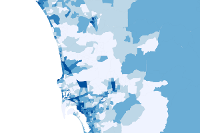

In [212]:
crime_by_tract

In [213]:
len(crime_data)

61603

In [214]:
crime_data[crime_data['ZipCode']==18072]

,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community


In [215]:
crime_data_sd = crime_data[crime_data['ZipCode'] >=90000.0]

In [216]:
len(crime_data_sd)

61188

In [217]:
zip_sd = crime_data_sd[['ZipCode']]

In [218]:
zip_sd_crime = zip_sd.groupby('ZipCode').count()

In [219]:
zip_count = crime_data_sd.groupby('ZipCode').ZipCode.agg('count').to_frame("count").reset_index()

In [220]:
zip_count.head()

,ZipCode,count
0,90038.0,1
1,90068.0,1
2,90069.0,1
3,91066.0,1
4,91355.0,1


In [221]:
final_drop.head()

,ZIP,average,number_crimes,race,Join_Count,case_numbe,time,crime,weapon,address,latitude,longitude,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,SHAPE
0,92113,58010,4,55813,1,16028219,Day,robbery,knife,"3500 main st San Diego, CA",32.687809,-117.118594,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.11859403, ""y"": 32.68780928, ""spatia..."
1,92113,58010,4,55813,1,18005199,Evening and Night,assault,hands,"3700 birch st San Diego, CA",32.689123,-117.114540,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.11453952, ""y"": 32.68912298, ""spatia..."
2,92113,58010,4,55813,1,19006514,Day,assault,stick,"2000 logan av San Diego, CA",32.700325,-117.142498,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.14249803, ""y"": 32.70032541, ""spatia..."
3,92113,58010,4,55813,1,19019302,Evening and Night,vandalism,spray paint,"2200 main st San Diego, CA",32.695622,-117.141571,1.399861e+08,65765.279016,1.841453e+07,23834.868005,"{""x"": -117.14157103, ""y"": 32.69562156, ""spatia..."
4,92105,63949,7,71446,1,16024587,Day,assault,rod,"4100 fairmount av San Diego, CA",32.751621,-117.100905,1.533141e+08,65485.481120,2.018697e+07,23765.440339,"{""x"": -117.10090548, ""y"": 32.751621, ""spatialR..."


In [222]:
zip_sdf_lst = list(final_drop['ZIP'])

In [223]:
case= zip_count.where(zip_count['ZipCode'].isin(zip_sdf_lst)).reset_index()


In [224]:
case = case.set_index('index')

case = case.rename(columns = {'count':'All_Crime_Count'})

In [225]:
case= case.dropna(how='all')

In [226]:
case = case.reset_index().drop(columns = ['index'])

In [227]:
all_crime_merge = case.merge(final_drop, left_on='ZipCode', right_on='ZIP')

In [228]:
all_crime_merge = all_crime_merge.drop(columns = ['ZIP'])

# Final Table
### Below is our final table after a lot of analysis and spatial work. We now have each zipcode with how many crimes in total that ocurred there, coupled with the number of hate crimes that occur there. We also have the average income in the average column as well as the population of base race for each of the zipcodes from the hatecrime table.

In [229]:
all_crime_merge.sort_values(by='All_Crime_Count',ascending = False).head(10)

,ZipCode,All_Crime_Count,average,number_crimes,race,Join_Count,case_numbe,time,crime,weapon,address,latitude,longitude,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,SHAPE
19,92101.0,5225.0,95321,20,45988,1,17016020,Early Morning/Late Night,assault,cane,"1100 a st San Diego, CA",32.718932,-117.154663,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.15466253, 'y': 32.7189316, 'spatial..."
22,92101.0,5225.0,95321,20,45988,1,17025240,Evening and Night,assault,vehicle,"1400 4th ave San Diego, CA",32.719943,-117.161191,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.16119055, 'y': 32.7199425, 'spatial..."
20,92101.0,5225.0,95321,20,45988,1,17019750,Evening and Night,"threat, phone call",phone,"700 a st San Diego, CA",32.718929,-117.158273,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.1582734, 'y': 32.7189291, 'spatialR..."
23,92101.0,5225.0,95321,20,45988,1,17043828,Early Morning/Late Night,assault,lock,"900 park bl San Diego, CA",32.714760,-117.153818,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.15381829, 'y': 32.7147598, 'spatial..."
18,92101.0,5225.0,95321,20,45988,1,17006219,Day,assault,cane,"200 park bl San Diego, CA",32.707529,-117.154899,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.15489919, 'y': 32.70752876, 'spatia..."
17,92101.0,5225.0,95321,20,45988,1,17005240,Evening and Night,assault,"hands, fists, feet","1200 k st San Diego, CA",32.708427,-117.153291,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.15329081, 'y': 32.70842713, 'spatia..."
16,92101.0,5225.0,95321,20,45988,1,16052116,Day,assault,"hands, fists, feet","2200 morley field dr San Diego, CA",32.739898,-117.142708,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.14270809, 'y': 32.73989832, 'spatia..."
15,92101.0,5225.0,95321,20,45988,1,16008751,Early Morning/Late Night,threat,knife,"300 park bl San Diego, CA",32.708696,-117.153825,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.15382542, 'y': 32.70869565, 'spatia..."
14,92101.0,5225.0,95321,20,45988,1,16004522,Early Morning/Late Night,vandalism,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.15181181, 'y': 32.70634749, 'spatia..."
13,92101.0,5225.0,95321,20,45988,1,16000456,Early Morning/Late Night,assault,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{'x': -117.1600734, 'y': 32.7126381, 'spatialR..."


In [230]:
all_crime_sdf = pd.DataFrame.spatial.from_xy(all_crime_merge,x_column = 'longitude', y_column = 'latitude')

In [231]:
# all_crime_fl = all_crime_sdf.spatial.to_featurelayer(title='SAAllCrime',tags = 'hatecrime')
# all_crime_fl.share(org=True)

In [232]:
all_crime_fl = gis.content.get('ffac1ebceca24795ad7ac0bcec05c130')


In [241]:
# cal_density = calculate_density(input_layer = all_crime_fl,bounding_polygon_layer = zip_codes,classification_type = 'GeometricInterval'
#                                ,output_name = 'Hate_crimePJ_zip')
# cal_density

<Item title:"Hate_crimePJ_zip" type:Feature Layer Collection owner:pjuneja_ucsd5>

In [242]:
# cal_density.share(org = True)

{'results': [{'itemId': 'df6e6e71ad184634a255695a2761cb04',
   'success': True,
   'notSharedWith': []}]}

In [243]:
cal_density = gis.content.get('df6e6e71ad184634a255695a2761cb04')

In [244]:
cal_density = cal_density.layers[0]

In [245]:
map8 = gis.map('San Diego County, CA')
map8.add_layer(cal_density)
map8

MapView(layout=Layout(height='400px', width='100%'))

# SUMMARY OF PRODUCTS AND RESULTS

Based on the density chart above, we see one really high ontensity area which is high in normal crime as well as hate crime. This is hatecrime area 92101. Based on our hypothesis we decided to do a lot more analysis and got a bunch of maps that we went on to include in our presentation but for our project in order to take this further, we need to atake into account whatever we learnt from our spatial data adn put it to the test by comparing our model values throughout and making scatter plots as shown below. 

Below Is our analysis for what we believe to be related to our hypothesis. All feature layers have been Uploaded to ArcGis Online. These are the scatter plots that we believe to be relevant to our project.

# Why GIS? 

The difference between our project and something that could be done just with pandas is, we needed gis to give us a lot of the information we couldn't have just stumbled across online. We managed to get a lot of maps from online which led to us starting from just a plain csv without any knowledge of the data. GIS took a normal hate crime project to the next level by allowing us to tell where the crime occured, the area of which it occured and information about that area which helped us conduct a lot of analysis. What follows below is a spatial analysis and a a few stats about what followed.

<Item title:"Heat Map of all crimes and Hate Crimes" type:Web Map owner:pjuneja_UCSDOnline3>
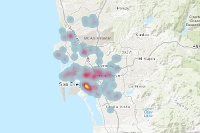

In [284]:
ab = gis.content.get('fa79371b9a7c497f8af5d2057bc7a5b8')
ab

This is a heat map of all top hate crimes and crimes and we seea bright red spot. This is the zipcode 92101 and e included this in our presentation. This area has an average income of about 100k withn80% of its population being all white people. This fits into our hypothesis of observing hate crimes. 

In [283]:
from arcgis.mapping import WebMap

In [285]:
sd_hate = WebMap(ab)

In [286]:
sd_hate

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [287]:
hate_crime_by_race = gis.content.get('ca95251d1d2e44c3b74ec73f589887af')

In [288]:
hate_crime_by_race = WebMap(hate_crime_by_race)

In this map the size of the circle represents base population by race. Now I know in a prior discussion we mentioned that race is a number a not a percentage. However when we look at the below map we need to think of the size of a circle as a measure of diversity. THe smaller the circle the more diverse the area. I think we can telll from the mpa below that areas that are more diverse seem to be lighter, that is have lesser hate crime tahn areas with areas with a low diveristy that is the bugger circles whihc are less diverse and have a higher base case.

In [292]:
hate_crime_by_race.legend = True
hate_crime_by_race

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [294]:
hate_crime_by_income = gis.content.get('863b45cf51cc450daea88af618919b7e')

In [295]:
hate_crime_by_income = WebMap(hate_crime_by_income)

The map below represents the average income per family in that area with larger the circle larger the income. The shade represents number of hate crimes in the area. To understand this map, areas with higher income seem to have a mixed number of hate crimes

In [296]:
hate_crime_by_income

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [246]:
all_crime_92101 = all_crime_sdf[all_crime_sdf['ZipCode']==92101.0]

In [261]:
all_crime_92101.head()

,ZipCode,All_Crime_Count,average,number_crimes,race,Join_Count,case_numbe,time,crime,weapon,address,latitude,longitude,SHAPE_STAr,SHAPE_STLe,Shape__Area,Shape__Length,SHAPE
13,92101.0,5225.0,95321,20,45988,1,16000456,Early Morning/Late Night,assault,"hands, fists, feet","500 g st San Diego, CA",32.712638,-117.160073,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{""x"": -117.1600734, ""y"": 32.7126381, ""spatialR..."
14,92101.0,5225.0,95321,20,45988,1,16004522,Early Morning/Late Night,vandalism,marker,"1400 imperial av San Diego, CA",32.706347,-117.151812,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{""x"": -117.15181181, ""y"": 32.70634749, ""spatia..."
15,92101.0,5225.0,95321,20,45988,1,16008751,Early Morning/Late Night,threat,knife,"300 park bl San Diego, CA",32.708696,-117.153825,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{""x"": -117.15382542, ""y"": 32.70869565, ""spatia..."
16,92101.0,5225.0,95321,20,45988,1,16052116,Day,assault,"hands, fists, feet","2200 morley field dr San Diego, CA",32.739898,-117.142708,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{""x"": -117.14270809, ""y"": 32.73989832, ""spatia..."
17,92101.0,5225.0,95321,20,45988,1,17005240,Evening and Night,assault,"hands, fists, feet","1200 k st San Diego, CA",32.708427,-117.153291,2.548928e+08,98792.532847,3.354889e+07,35841.688407,"{""x"": -117.15329081, ""y"": 32.70842713, ""spatia..."


In [262]:
#all_crime_92101_fl = all_crime_92101.spatial.to_featurelayer(title='921AllCrime1',tags = 'hatecrime')
#all_crime_92101_fl.share(org=True)

In [249]:
all_crime_merge.columns


Index(['ZipCode', 'All_Crime_Count', 'average', 'number_crimes', 'race',
       'Join_Count', 'case_numbe', 'time', 'crime', 'weapon', 'address',
       'latitude', 'longitude', 'SHAPE_STAr', 'SHAPE_STLe', 'Shape__Area',
       'Shape__Length', 'SHAPE'],
      dtype='object')

In [250]:
#plot of avg income/all crimes
#avg/hatecrimes

#RaceBase vs AllCrime
#Raceabase vs HateCrime


From our first graph of All crimes vs average income we can see that areas which have a higher income have a lower crime rate which is something that makes sense because better and higher income areas would have a lesser crime rate.

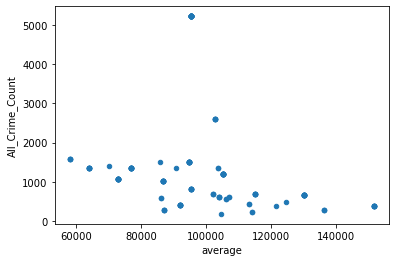

In [251]:
all_crime_merge.plot.scatter(x='average', y='All_Crime_Count')

Now if we look at the number of hate crimes vs average income we can see this there is no specific trend for one possibly because of the amount of data we had. But whats interesting is that we can see how a place with an average income of about 100k has a lot of hate crime. This is primarily in our opinion, due to a higher base race of population present htere giving a sense of entitilment which may affect this.


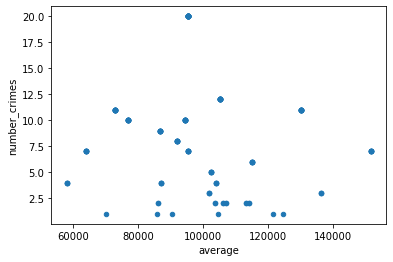

In [252]:
all_crime_merge.plot.scatter(x='average', y='number_crimes')

This cell below refers to crime depending on base rase of the population in that area. What we need to to understand and this will be mentioned in the considerations as well, base race is a number and not a percentage which could have affected our values. We don'thave a clear trend but can see a slight increase which is enough to point out to us that as there are more numbers of a base race living in an area, minorities seeem to be targetted more and hence have a higher number of hatecrimes

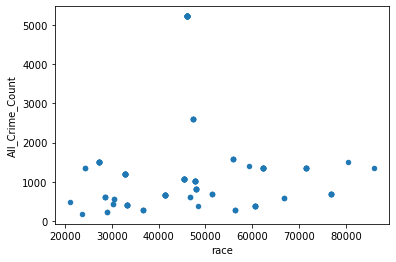

In [253]:
all_crime_merge.plot.scatter(x='race', y='All_Crime_Count')

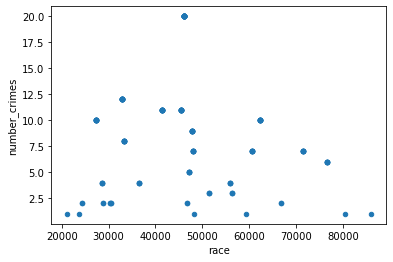

In [254]:
all_crime_merge.plot.scatter(x='race', y='number_crimes')

This scatter plot shows us that areas with a higher number of hatecrimes also seem to have a higher number of crimes.

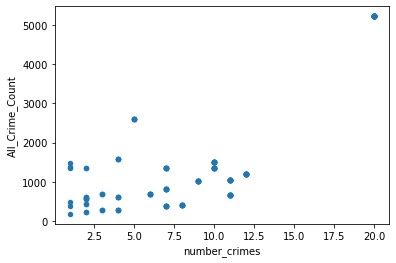

In [255]:
all_crime_merge.plot.scatter(x='number_crimes', y='All_Crime_Count')

# Discussion

#### DISCUSSION about CAVEATS

The main caveats of this project was the amount of data we had. We had a 160 reports. The major thing worth pointing out that peple don't actually report hate crimes. there are only a handful of reports. This was tough as it did not help us as there wasn't suffecient data. Another issue that we had to keep dealing with was after geoenrichment the base race population values that we got turned out to be a number and not a percentage ad hence did not leave enough room to understand our data in context of what was wrong. 

While working on this dataset, a common question my partner and I realised needed to be answered is who are hate crimes committed against? and who commits the? The simple answer if we ask anyone it's always the race in the minority. Tradiotnally white people can also be victims of hate crimes and to test this out and to add to our discussion we did this below.

In [257]:
hate_info2= hate_crime[['case_number','number_of_suspects', 'suspect', 'victim_count',
       'victim_other', 'injury', 'suspect_race_0', 'suspect_race_1',
       'suspect_race_2', 'suspect_sex_0', 'suspect_sex_1', 'suspect_sex_2',
       'victim_race_0', 'victim_race_1', 'victim_race_2', 'victim_sex_0',
       'victim_sex_1', 'victim_sex_2']]

In [297]:
#hate_info2

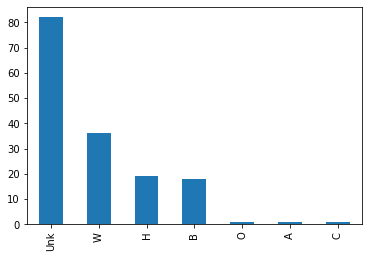

In [259]:
hate_info2['suspect_race_0'].value_counts().plot.bar()

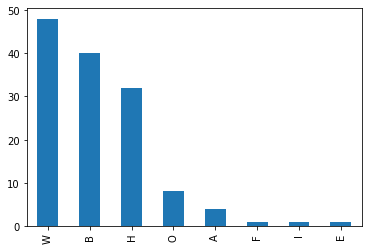

In [260]:
hate_info2['victim_race_0'].value_counts().plot.bar()

As we can white people have the highest number in both which is very interesting. Throughout our project and through our analysis I think it was safe to assume thateven though our hypothesis made sense with the overarching theme of the project,which was predicting where hate crime would be the highest and I think we have had succesful findings that can be used by tthe city planner etc to ensure these areas are safer for all members od the community.

#### Discussion in relation to readings

Our initial literature showed us the state of hate crime in San Diego and not much about the topic itself. Based on our understanding we decided to investigate base rce, income and the total number of crimes in relation to what we believed would be be suitable for analysis. The readings did not have anything concrete in terms of analysis for us to do hence this projct was more of an exploratory measure into a problem we believed needed tackling here in San Diego. For example a couple of the zipcodes we discovered such as 92101, was very high in cime and hate crime even though that area seemed like a well to do area with a high mean income. These areas could have learning centers etc built so people can respect the area and the cultures of the poeple that live there and ensure these crimes do not occur. An increase in patrolling routes in these areas would also make these areas a lot safer.

# Conclusion and Future work

While our hypothesis seems to have been proved in its own way correct, there is a lot of scope for this project. These could act as recommendations for the city of San Diego which involve learning centers in areas with high rates of hate crime and crime. Another solution mentioned above would be increasing police stations and adding more patrolling routes in this area to help reduce these crime rates, and ensure a more safe environment for all the communities that are there

Future Scope of this project involves creating geospatial statistics for analysis. I would have really liked doing network analysis to to create a mesh of all hate crime occurences and identify good patrolling routes, locations for learning centers and creation of police precincts. Also once we get a hugher number of reports, we can create a model to predict which crimesare hatecrimes on a larger crime database as these usually dont get reported seperately. This will increase the number of records we have and create more avenues for analysis

In conclusion our hypothesis seemed to have worked and above is how we documented our project accordingly.